# 0. INITIALIZERS

In [1]:
### IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
### A HELPER FUNCTION TO DISPLAY SECTION TITLE
def print_section(title):
    print(f'{"="*60}\n{title}\n{"="*60}')

### SEE ALL COLUMNS
pd.set_option('display.max_columns', None)

# 1. DATA LOADING

In [3]:
### LOAD DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. INITIAL DATA INSPECTION

## GET OVERVIEW

In [4]:
### TRAIN DATASET
print_section('TRAIN')
train.info()
display(train.head())
display(train.describe())

### TEST DATASET
print_section('TEST')
test.info()
display(test.head())
display(test.describe())

TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


TEST
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   154 non-null    int64  
 1   no_times_pregnant      154 non-null    int64  
 2   glucose_concentration  154 non-null    int64  
 3   blood_pressure         154 non-null    int64  
 4   skin_fold_thickness    154 non-null    int64  
 5   serum_insulin          154 non-null    int64  
 6   bmi                    154 non-null    float64
 7   diabetes pedigree      154 non-null    float64
 8   age                    154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,379.422078,3.811688,122.298701,70.461039,21.701299,81.571429,32.322078,0.493942,32.902597
std,215.338912,3.425719,34.769480,16.935917,16.213095,105.178271,7.386724,0.332439,11.090106
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,194.250000,1.000000,97.000000,64.000000,0.000000,0.000000,28.150000,0.248000,24.000000
50%,383.000000,3.000000,115.000000,72.000000,24.500000,52.000000,32.900000,0.411500,29.500000
75%,583.250000,6.000000,144.750000,78.000000,33.000000,129.500000,36.200000,0.654750,40.000000
max,738.000000,14.000000,199.000000,122.000000,99.000000,474.000000,67.100000,2.137000,66.000000


Quick remark on the statistics:
- Some features (e.g., glucose_concentration, blood_pressure, skin_fold_thickness) have invalid zeros. 

## IDENTIFY ISSUES FOR DATA CLEANING

### SUMMARY FUNCTION

In [5]:
### UDF TO SUMMARIZE THE ISSUES IDENTIFIED FOR DATA CLEANING 
def initial_data_inspection(train, test, 
                            train_dup, test_dup,
                            train_na, test_na,
                            train_zero, train_pos, test_zero, test_pos,
                            before_train_counts, before_test_counts):
    ### DICTIONARY TO SEPARATE THE ISSUES
    summary = {
        "Duplicates": [],
        "Missing Values": [],
        "Data Types": [],
        "Invalid Values": [],
        "Outliers": []
    }
    ### DUPLICATES
    summary["Duplicates"].append("✅ No duplicates in TRAIN" if train_dup == 0 else f"❌ {train_dup} duplicates found in TRAIN")
    summary["Duplicates"].append("✅ No duplicates in TEST" if test_dup == 0 else f"❌ {test_dup} duplicates found in TEST")

    ### MISSING
    summary["Missing Values"].append("✅ No missing values in TRAIN" if train_na == 0 else f"❌ {train_na} missing values in TRAIN")
    summary["Missing Values"].append("✅ No missing values in TEST" if test_na == 0 else f"❌ {test_na} missing values in TEST")

    ### DATA TYPES
    summary["Data Types"].append(dtype_check(train, "TRAIN"))
    summary["Data Types"].append(dtype_check(test, "TEST"))

    ### INVALID VALUES
    if (train_zero.sum().sum() > 0) or (train_pos.sum().sum() > 0):
        summary['Invalid Values'].append('❌ Invalid values found in TRAIN')
    else:
        summary['Invalid Values'].append('✅ No invalid values in TRAIN')

    if (test_zero.sum().sum() > 0) or (test_pos.sum().sum() > 0):
        summary['Invalid Values'].append('❌ Invalid values found in TEST')
    else:
        summary['Invalid Values'].append('✅ No invalid values in TEST')

    ### OUTLIERS
    summary["Outliers"].append("✅ No outliers in TRAIN" if before_train_counts.sum() == 0 else "❌ Outliers found in TRAIN")
    summary["Outliers"].append("✅ No outliers in TEST" if before_test_counts.sum() == 0 else "❌ Outliers found in TEST")

    return summary

In [6]:
### UDF TO DISPLAY THE ISSUE SUMMARY NICELY
def display_summary(summary):
    print_section('INITIAL DATA INSPECTION SUMMARY')
    for section, items in summary.items():
        print(f'\n{section}:')
        print('-'*60)
        for item in items:
            print(f'{item}')

### CHECK DUPLICATES

In [7]:
### CHECK IF ANY ROW DUPLICATES PER DATASET
print_section('CHECK DUPLICATES')

train_dup = train.duplicated().sum()
test_dup = test.duplicated().sum()

print(f'TRAIN: {train_dup}')
print(f'TEST: {test_dup}')

CHECK DUPLICATES
TRAIN: 0
TEST: 0


### CHECK MISSING VALUES

In [8]:
### CHECK IF ANY MISSING VALUES PER COLUMN PER DATASET
print_section('CHECK MISSING VALUES')

train_col_na = train.isnull().sum()
test_col_na = test.isnull().sum()

print('TRAIN:')
print(train_col_na)
print('\nTEST:')
print(test_col_na)

### SUM UP THE MISSING VALUES (IF ANY) PER DATASET FOR SUMMARY LATER
train_na = train_col_na.sum()
test_na = test_col_na.sum()

CHECK MISSING VALUES
TRAIN:
p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

TEST:
p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
dtype: int64


### CHECK DATA TYPES

In [9]:
### VIEW THE DATA TYPE OF EACH COLUMN IN EACH DATASET
print_section('CHECK DATA TYPES')
print('TRAIN:')
print(train.dtypes)
print('\nTEST:')
print(test.dtypes)


### UDF TO CHECK IF EACH COLUMN IS NUMERIC (FLOAT/INT)
# ML USUALLY TAKES NUMERIC COLUMNS ONLY
def dtype_check(df, label):
    non_numeric_cols = [c for c in df.columns if not pd.api.types.is_numeric_dtype(df[c])]
    if not non_numeric_cols:
        return f'✅ Correct data types in {label}'
    return f'❌ Data type issues in {label}: {non_numeric_cols}'

CHECK DATA TYPES
TRAIN:
p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

TEST:
p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
dtype: object


### CHECK INVALID VALUES

In [10]:
### 1. DEFINE COLUMNS THAT CAN BE ZERO BUT NOT NEGATIVE
test_zero_cols = ['p_id', 'no_times_pregnant', 'diabetes pedigree']
train_zero_cols = test_zero_cols + ['diabetes']

### 2. DEFINE COLUMNS THAT MUST BE POSITIVE (NOT ZERO/NEGATIVE)
pos_cols = [col for col in train.columns if col not in train_zero_cols]

### 3. UDF TO IDENTIFY INVALID (ZERO/NEGATIVE) VALUES
def check_invalid(df, zero_cols, pos_cols, name='dataframe'):
    print('-'*60)
    print(f'{name}:')
    print('-'*60)
    ### COLUMNS THAT CAN BE ZERO BUT NOT NEGATIVE
    neg_only_counts = (df[zero_cols] < 0).sum()
    zero_df = pd.DataFrame({
        "negatives": neg_only_counts
    })
    print("1. COLUMNS THAT CAN BE ZERO BUT NOT NEGATIVE (CHECK NEGATIVE)")
    print(zero_df)

    ### COLUMNS THAT MUST BE POSITIVE (NOT ZERO/NEGATIVE)
    zero_counts = (df[pos_cols] == 0).sum()
    neg_counts = (df[pos_cols] < 0).sum()
    pos_df = pd.DataFrame({
        "zeros": zero_counts,
        "negatives": neg_counts
    })
    print("\n2. COLUMNS THAT MUST BE POSITIVE (CHECK ZERO/NEGATIVE)")
    print(pos_df)

    return zero_df, pos_df

### 4. SHOW REPORT
print_section('CHECK INVALID VALUES')
train_zero, train_pos = check_invalid(train, train_zero_cols, pos_cols, 'TRAIN')
test_zero, test_pos = check_invalid(test, test_zero_cols, pos_cols, 'TEST')

CHECK INVALID VALUES
------------------------------------------------------------
TRAIN:
------------------------------------------------------------
1. COLUMNS THAT CAN BE ZERO BUT NOT NEGATIVE (CHECK NEGATIVE)
                   negatives
p_id                       0
no_times_pregnant          0
diabetes pedigree          0
diabetes                   0

2. COLUMNS THAT MUST BE POSITIVE (CHECK ZERO/NEGATIVE)
                       zeros  negatives
glucose_concentration      4          0
blood_pressure            31          0
skin_fold_thickness      187          0
serum_insulin            304          0
bmi                       10          0
age                        0          0
------------------------------------------------------------
TEST:
------------------------------------------------------------
1. COLUMNS THAT CAN BE ZERO BUT NOT NEGATIVE (CHECK NEGATIVE)
                   negatives
p_id                       0
no_times_pregnant          0
diabetes pedigree          0



### CHECK OUTLIERS
- IQR method is used to identify outliers.
- TRAIN dataset is used for the bounds for both TRAIN dataset & TEST dataset.

In [11]:
### DEFINE FEATURES (EXCLUDE ID & TARGET)
feature_cols = [c for c in train.columns if c not in ['p_id', 'diabetes']]

### UDF TO COMPUTE IQR BOUNDARIES
# For each column in col, compute IQR-based lower and upper bounds.
# Returns (lower, upper) where lower = Q1 - 1.5*IQR and upper = Q3 + 1.5*IQR.
def compute_iqr_bounds(df, col):
    s = df[col]
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

### UDF TO COUNT OUTLIERS BEFORE CAPPING
def outlier_counts_by_bounds(df, cols, bounds_source='train'):
    counts = {}
    ### FOR EACH COLUMN IN COLS
    for col in cols:
        s = df[col]
        ### COMPUTE IQR BOUNDS
        lower, upper = compute_iqr_bounds(df, col)
        ### COUNT OUTLIERS OUTSIDE THOSE BOUNDS
        counts[col] = int(((s < lower) | (s > upper)).sum())
    return pd.Series(counts)

CHECK OUTLIERS (OUTSIDE IQR BOUNDS OF TRAIN)


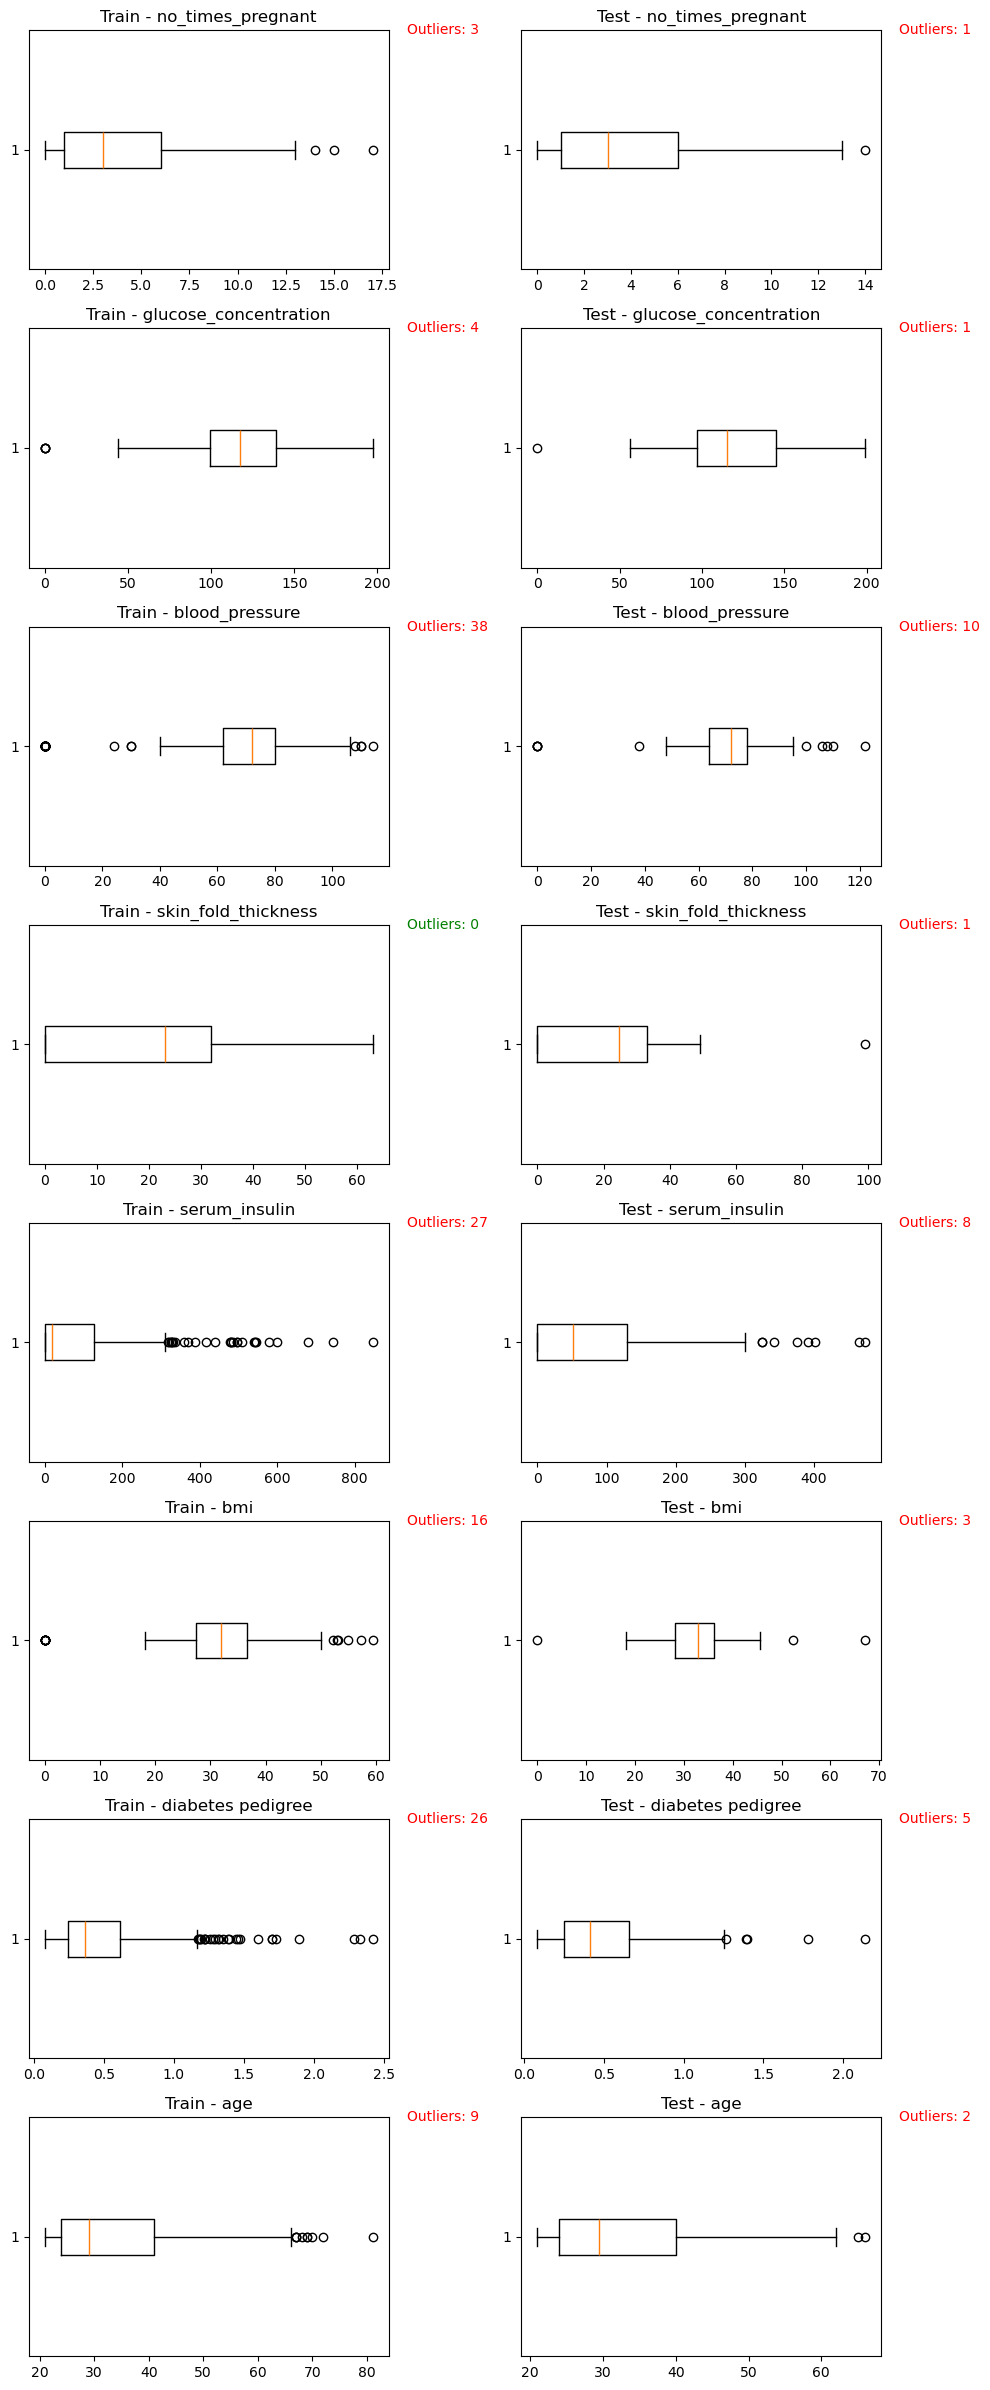

In [12]:
### PREP THE SUBPLOT GRID
n_featureCols = len(feature_cols)
ncols = 2  # TRAIN | TEST
nrows = n_featureCols  # ONE ROW PER FEATURE
fig, axes = plt.subplots(nrows, ncols, figsize=(10, nrows*3))

print_section('CHECK OUTLIERS (OUTSIDE IQR BOUNDS OF TRAIN)')

### GET OUTLIER COUNTS BEFORE CAPPING
before_train_counts = outlier_counts_by_bounds(train, feature_cols)
before_test_counts = outlier_counts_by_bounds(test, feature_cols)

### FOR EACH COLUMN IN TRAIN/TEST, PLOT THE BOXPLOT & SHOW OUTLIER COUNT BEFORE CAPPING
for i, c in enumerate(feature_cols):
    ### TRAIN BOXPLOT (LEFT COLUMN)
    axes[i, 0].boxplot(train[c], vert=False)
    axes[i, 0].set_title(f'Train - {c}')
    ### RED IF OUTLIERS; GREEN IF NO OUTLIERS
    train_color = 'green' if before_train_counts[c] == 0 else 'red'
    axes[i, 0].text(1.05, 1, f"Outliers: {before_train_counts[c]}", 
                    transform=axes[i, 0].transAxes, fontsize=10, color=train_color, va='center')

    axes[i, 1].boxplot(test[c], vert=False)
    axes[i, 1].set_title(f'Test - {c}')
    ### RED IF OUTLIERS; GREEN IF NO OUTLIERS
    test_color = 'green' if before_test_counts[c] == 0 else 'red'
    axes[i, 1].text(1.05, 1, f"Outliers: {before_test_counts[c]}", 
                    transform=axes[i, 1].transAxes, fontsize=10, color=test_color, va='center')

plt.tight_layout()
plt.show()

### SUMMARIZE ISSUES FOUND

In [13]:
issueSummary = initial_data_inspection(
    train, test,
    train_dup, test_dup,
    train_na, test_na,
    train_zero, train_pos, test_zero, test_pos,
    before_train_counts, before_test_counts
)

display_summary(issueSummary)

INITIAL DATA INSPECTION SUMMARY

Duplicates:
------------------------------------------------------------
✅ No duplicates in TRAIN
✅ No duplicates in TEST

Missing Values:
------------------------------------------------------------
✅ No missing values in TRAIN
✅ No missing values in TEST

Data Types:
------------------------------------------------------------
✅ Correct data types in TRAIN
✅ Correct data types in TEST

Invalid Values:
------------------------------------------------------------
❌ Invalid values found in TRAIN
❌ Invalid values found in TEST

Outliers:
------------------------------------------------------------
❌ Outliers found in TRAIN
❌ Outliers found in TEST


# 3. DATA CLEANING

## HANDLE INVALID VALUES
- No negative values detected.
- Some columns which must be positive (cannot be zero/negative) were detected to have zeros.
- All invalid values, zeros in this case, were replaced via median imputation from the Train data.

In [14]:
### IMPUTE INVALID VALUES (ZERO) WITH MEDIAN OF TRAIN DATA
for col in pos_cols:
    median_val = train[col].median()
    train[col] = train[col].mask(train[col] <= 0, median_val)
    test[col] = test[col].mask(test[col] <= 0, median_val)

### VALIDATE AFTER IMPUTE
train_zero_after, train_pos_after = check_invalid(train, train_zero_cols, pos_cols, 'TRAIN (AFTER IMPUTE)')
test_zero_after, test_pos_after = check_invalid(test, test_zero_cols, pos_cols, 'TEST (AFTER IMPUTE)')

------------------------------------------------------------
TRAIN (AFTER IMPUTE):
------------------------------------------------------------
1. COLUMNS THAT CAN BE ZERO BUT NOT NEGATIVE (CHECK NEGATIVE)
                   negatives
p_id                       0
no_times_pregnant          0
diabetes pedigree          0
diabetes                   0

2. COLUMNS THAT MUST BE POSITIVE (CHECK ZERO/NEGATIVE)
                       zeros  negatives
glucose_concentration      0          0
blood_pressure             0          0
skin_fold_thickness        0          0
serum_insulin              0          0
bmi                        0          0
age                        0          0
------------------------------------------------------------
TEST (AFTER IMPUTE):
------------------------------------------------------------
1. COLUMNS THAT CAN BE ZERO BUT NOT NEGATIVE (CHECK NEGATIVE)
                   negatives
p_id                       0
no_times_pregnant          0
diabetes pedigree    

## HANDLE OUTLIERS
- **IQR method** is used to handle outliers.
- Same boundaries are applied to both Train & Test.
- Due to the nature of the data and the limited Train data, outliers are capped instead of being removed.

In [15]:
### UDF TO COUNT OUTLIERS (OUTSIDE ORIGINAL TRAIN BOUNDS) AFTER CAPPING
# For each column in cols, use the SAME ORIGINAL Train bounds in bounds_dict (bounds_dict[col] = (lower, upper))
# This ensures a fair comparison and clearly shows if the capping works based on the SAME bounds
def outlier_counts_by_ori_bounds(df, bounds_dict, cols):
    counts = {}
    for col in cols:
        lower, upper = bounds_dict[col]
        s = df[col]
        counts[col] = int(((s < lower) | (s > upper)).sum())
    return pd.Series(counts)

In [16]:
### PRESERVE DATASETS BEFORE CAPPING - FOR COMPARISON LATER
train_before_cap = train.copy()
test_before_cap = test.copy()

### APPLY CAPPING ON OUTLIERS USING TRAIN'S BOUNDARIES
bounds = {}

for col in feature_cols:
    lower, upper = compute_iqr_bounds(train, col)  # USE TRAIN
    bounds[col] = (lower, upper)
    
    ### CLIP (REPLACE) OUTLIERS WITH LOWER OR UPPER BOUNDS
    train[col] = train[col].clip(lower=lower, upper=upper)
    test[col] = test[col].clip(lower=lower, upper=upper)

### GET OUTLIER (OUTSIDE ORIGINAL TRAIN BOUNDS) COUNTS AFTER CAPPING -- SHOULD BE 0
after_train_counts = outlier_counts_by_ori_bounds(train, bounds, feature_cols)
after_test_counts  = outlier_counts_by_ori_bounds(test, bounds, feature_cols)

### PRINT BEFORE/AFTER CAPPING TABLES
train_outliers = pd.concat([before_train_counts.rename("before_capping"),
                           after_train_counts.rename("after_capping")], axis=1) \
                    .sort_values("before_capping", ascending=False)

test_outliers = pd.concat([before_test_counts.rename("before_capping"),
                          after_test_counts.rename("after_capping")], axis=1) \
                    .sort_values("before_capping", ascending=False)

print("TRAIN — Outlier Counts")
display(train_outliers)
print("\nTEST — Outlier Counts")
display(test_outliers)

TRAIN — Outlier Counts


,before_capping,after_capping
blood_pressure,38,0
serum_insulin,27,0
diabetes pedigree,26,0
bmi,16,0
age,9,0
glucose_concentration,4,0
no_times_pregnant,3,0
skin_fold_thickness,0,0



TEST — Outlier Counts


,before_capping,after_capping
blood_pressure,10,0
serum_insulin,8,0
diabetes pedigree,5,0
bmi,3,0
age,2,0
no_times_pregnant,1,0
glucose_concentration,1,0
skin_fold_thickness,1,0


### VISUALIZE BEFORE & AFTER CAPPING

#### TRAIN
- Some of the lower IQR bounds may be mathematically negative. That's alright since we handled invalid (zero/negative) values.

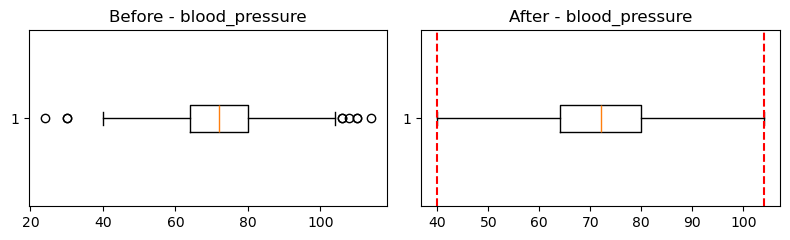

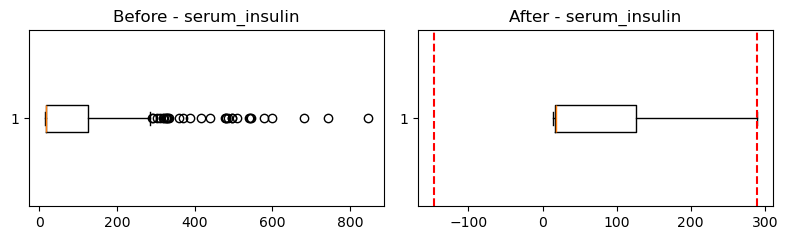

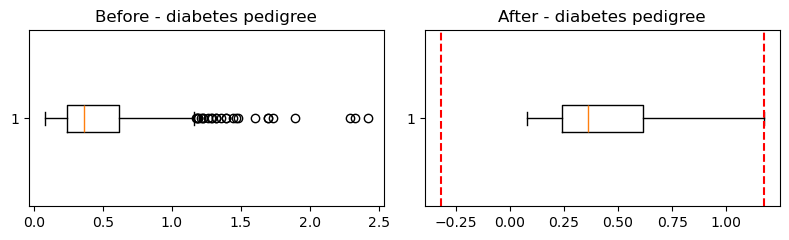

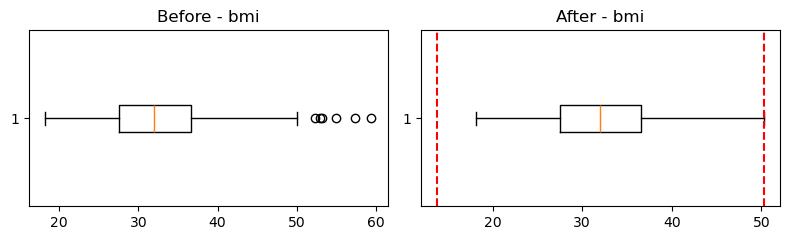

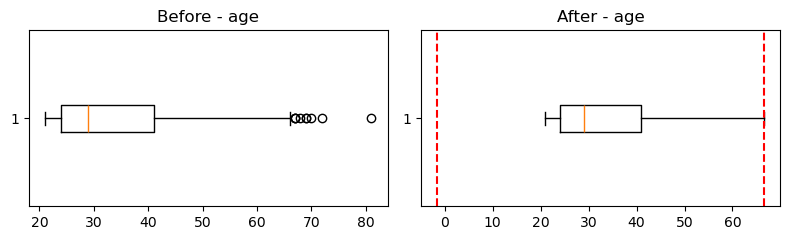

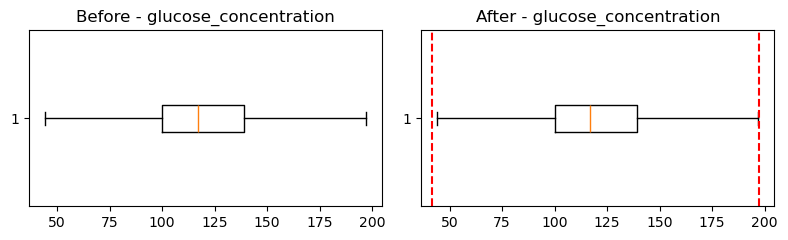

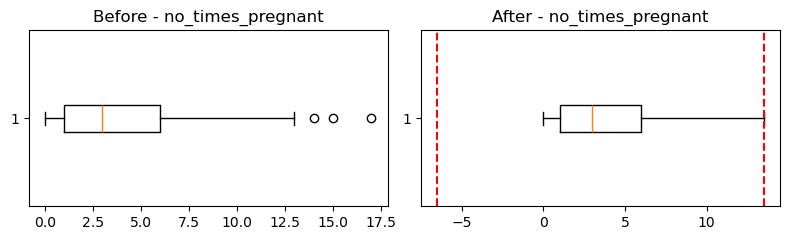

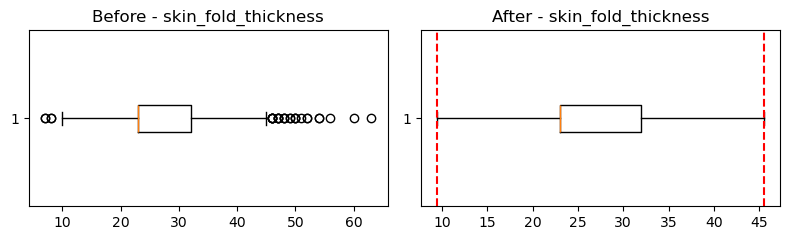

In [17]:
### SORT FIGURES OF FEATURES BY DESCENDING OUTLIER COUNT BEFORE CAPPING
sorted_features = before_train_counts.sort_values(ascending=False).index.tolist()

### BOX PLOTS ORDERED BY OUTLIER SEVERITY
matplotlib.rcParams['figure.figsize'] = (8, 2.5)

for c in sorted_features:
    plt.figure()
    
    ### BEFORE CAPPING
    plt.subplot(1, 2, 1)
    plt.boxplot(train_before_cap[c], vert=False)
    plt.title(f'Before - {c}')
    
    ## AFTER CAPPING
    plt.subplot(1, 2, 2)
    plt.boxplot(train[c], vert=False)
    plt.title(f'After - {c}')

    ### VERTICAL LINES TO INDICATE TRAIN'S LOWER/UPPER BOUNDS
    lower, upper = bounds[c]
    plt.axvline(lower, color="red", linestyle="--")
    plt.axvline(upper, color="red", linestyle="--")
    
    plt.tight_layout()
    plt.show()

#### TEST
- plt.boxplot detects outliers relative to each dataset’s own distribution, not relative to train-based IQR boundaries.
- Hence, you may see "false outliers" visualised.
- To prevent confusion, I added red dotted vertical lines to indicate train's IQR boundaries.
- Some of the lower IQR bounds may be mathematically negative. That's alright since we handled invalid (zero/negative) values.

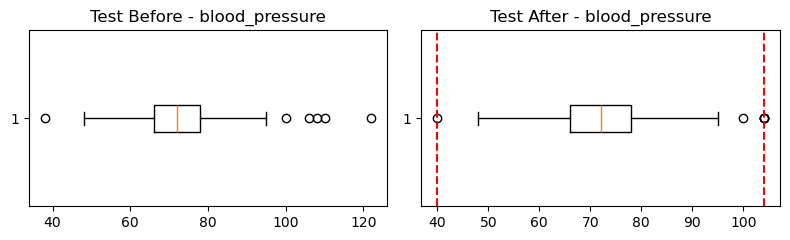

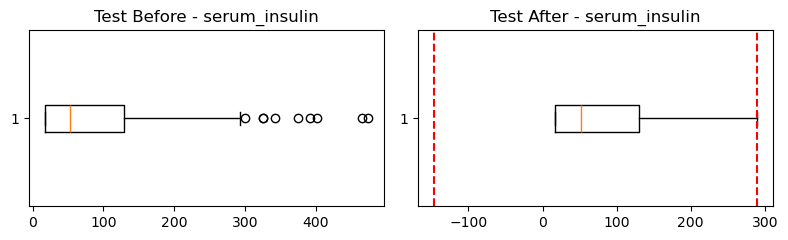

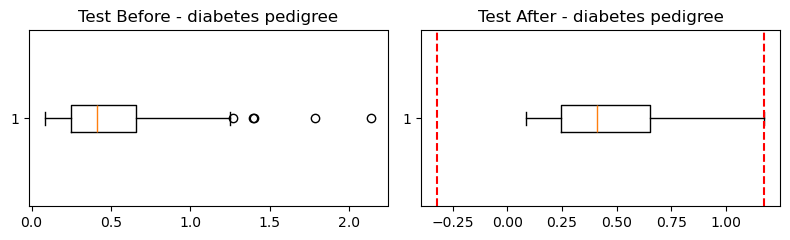

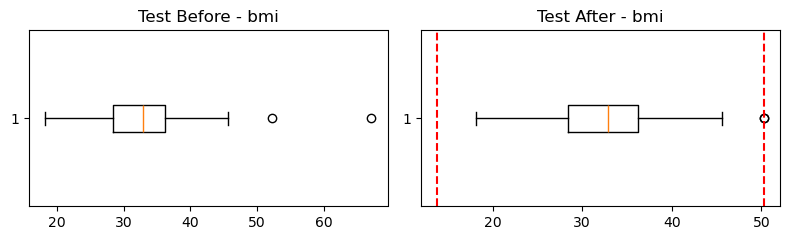

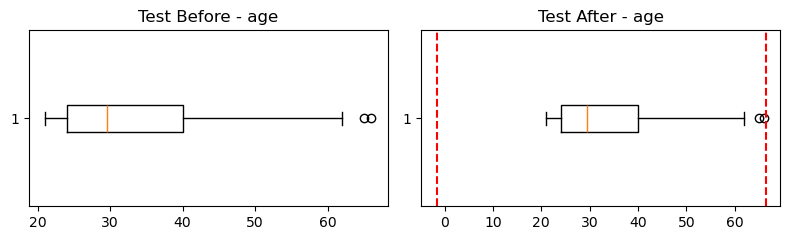

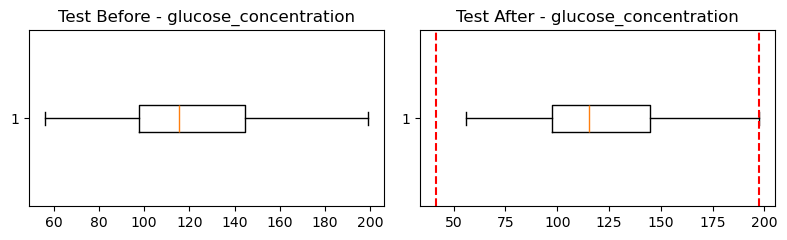

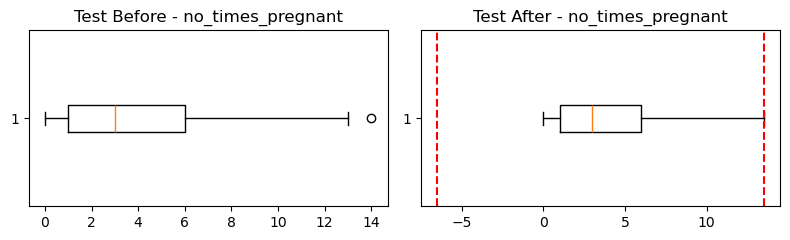

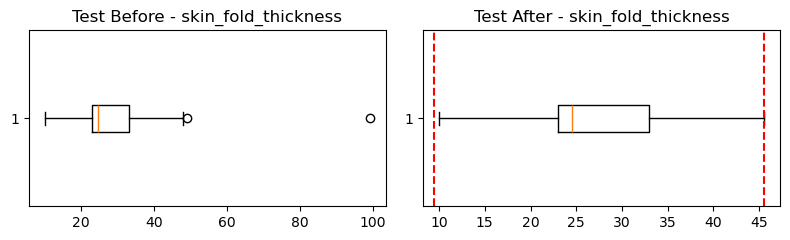

In [18]:
### SAME ORDERING OF FEATURES BASED ON TRAIN OUTLIER COUNTS
sorted_features = before_train_counts.sort_values(ascending=False).index.tolist()

matplotlib.rcParams['figure.figsize'] = (8, 2.5)

for c in sorted_features:
    plt.figure()
    
    ### BEFORE CAPPING
    plt.subplot(1, 2, 1)
    plt.boxplot(test_before_cap[c], vert=False)
    plt.title(f'Test Before - {c}')
    
    ### AFTER CAPPING
    plt.subplot(1, 2, 2)
    plt.boxplot(test[c], vert=False)
    plt.title(f'Test After - {c}')

    ### VERTICAL LINES TO INDICATE TRAIN'S LOWER/UPPER BOUNDS
    lower, upper = bounds[c]
    plt.axvline(lower, color="red", linestyle="--")
    plt.axvline(upper, color="red", linestyle="--")
    
    plt.tight_layout()
    plt.show()

In [19]:
### LATEST CLEANED DATA
train_clean = train.copy()
test_clean = test.copy()
display(train_clean.head())
display(test_clean.head())

print('''
\n✅ DATA CLEANING COMPLETED!\n
- TRAIN DATASET IS READY FOR EDA.
- TEST DATASET IS READY FOR FEATURE ENGINEERING.
''')

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2.0,112,68,22.0,94.0,34.1,0.315,26.0,0
1,25,11.0,143,94,33.0,146.0,36.6,0.254,51.0,1
2,710,2.0,93,64,32.0,160.0,38.0,0.674,23.0,1
3,658,1.0,120,80,45.5,200.0,38.9,1.162,41.0,0
4,542,3.0,128,72,25.0,190.0,32.4,0.549,27.0,1


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12.0,140.0,85,33.0,17.0,37.4,0.244,41
1,411,6.0,102.0,90,39.0,17.0,35.7,0.674,28
2,639,7.0,97.0,76,32.0,91.0,40.9,0.871,32
3,213,7.0,179.0,95,31.0,17.0,34.2,0.164,60
4,181,6.0,87.0,80,23.0,17.0,23.2,0.084,32




✅ DATA CLEANING COMPLETED!

- TRAIN DATASET IS READY FOR EDA.
- TEST DATASET IS READY FOR FEATURE ENGINEERING.



# 4. EDA
- EDA is done only on the TRAIN dataset without touching the TEST dataset.
- This is to prevent leaking information and artificially improving ML model performance.

In [20]:
### SET PLOTTING STYLE
sns.set_theme(style='whitegrid', rc={'figure.figsize': (12, 6)})

## TARGET VARIABLE ANALYSIS

TARGET VARIABLE ANALYSIS

Diabetes Distribution:
Non-Diabetic (0): 400 (65.1%)
Diabetic (1): 214 (34.9%)

Non-Diabetic-to-Diabetic Ratio: 1.87:1


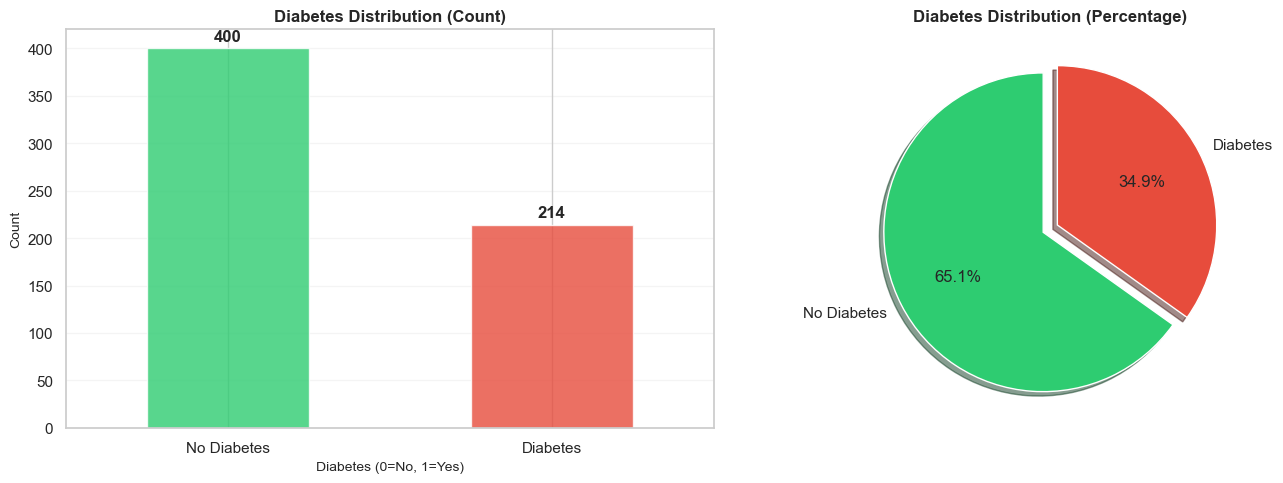

In [21]:
print_section('TARGET VARIABLE ANALYSIS')

### SHOW COUNT AND PERCENTAGE
diabetes_count = train_clean['diabetes'].value_counts()
diabetes_pct = train_clean['diabetes'].value_counts(normalize=True) * 100

# :.1f and :.2f to round to 1 and 2 decimal place(s) respectively
print('\nDiabetes Distribution:')
print(f'Non-Diabetic (0): {diabetes_count[0]} ({diabetes_pct[0]:.1f}%)')
print(f'Diabetic (1): {diabetes_count[1]} ({diabetes_pct[1]:.1f}%)')
print(f'\nNon-Diabetic-to-Diabetic Ratio: {diabetes_count[0]/diabetes_count[1]:.2f}:1')

### VISUALIZE TARGET DISTRIBUTION
# Bar Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors = ['#2ecc71', '#e74c3c']
diabetes_count.plot(kind='bar', ax=axes[0], color=colors, alpha=0.8)
axes[0].set_title('Diabetes Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Diabetes (0=No, 1=Yes)', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
axes[0].grid(axis='y', alpha=0.2)

# Add count labels on bars
for i, v in enumerate(diabetes_count):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie Chart
axes[1].pie(diabetes_count, labels=['No Diabetes', 'Diabetes'], 
            colors=colors, autopct='%1.1f%%', startangle=90,
            explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Diabetes Distribution (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

- Dataset has class imbalance - more non-diabetic patients.
- This needs to be considered during model training and evaluation.

## STATISTICAL SUMMARY BY DIABETES STATUS

In [22]:
print_section('STATISTICAL SUMMARY BY DIABETES')

### SUMMARY STATISTICS GROUPED BY DIABETES STATUS
print('\n--- Non-Diabetic (diabetes=0) ---')
non_diabetic_stat = train_clean[train_clean['diabetes']==0][feature_cols].describe()
display(non_diabetic_stat.round(2))

print('\n--- Diabetic (diabetes=1) ---')
diabetic_stat = train_clean[train_clean['diabetes']==1][feature_cols].describe()
display(diabetic_stat.round(2))

### COMPARE MEANS BETWEEN GROUPS
print('\n--- Mean Comparison: Diabetic vs Non-Diabetic ---')
mean_compare = pd.DataFrame({
    'Non-Diabetic': train_clean[train_clean['diabetes']==0][feature_cols].mean(),
    'Diabetic': train_clean[train_clean['diabetes']==1][feature_cols].mean(),
})
mean_compare['Difference'] = mean_compare['Diabetic'] - mean_compare['Non-Diabetic']
mean_compare['Pct_Change'] = (mean_compare['Difference'] / mean_compare['Non-Diabetic'] * 100)
display(mean_compare.round(2))

STATISTICAL SUMMARY BY DIABETES

--- Non-Diabetic (diabetes=0) ---


,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,3.34,110.41,70.82,26.09,72.43,30.92,0.41,31.32
std,3.01,23.78,11.33,8.43,75.60,6.50,0.26,11.77
min,0.00,44.00,40.00,9.50,15.00,18.20,0.08,21.00
25%,1.00,94.00,62.00,23.00,17.00,25.90,0.23,23.00
50%,2.00,108.00,72.00,23.00,36.00,30.10,0.33,27.00
75%,5.00,124.25,78.00,31.00,105.00,35.30,0.55,37.00
max,13.00,197.00,104.00,45.50,289.50,50.25,1.17,66.50



--- Diabetic (diabetes=1) ---


,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,4.79,141.67,75.38,28.92,93.18,35.13,0.52,36.92
std,3.67,28.93,11.81,8.22,95.39,6.28,0.31,10.89
min,0.00,78.00,40.00,9.50,14.00,22.90,0.12,21.00
25%,1.25,119.00,68.00,23.00,17.00,30.50,0.26,28.00
50%,4.00,140.00,74.00,26.00,17.00,34.05,0.43,36.00
75%,8.00,164.75,84.00,35.00,165.00,38.92,0.73,44.75
max,13.50,197.00,104.00,45.50,289.50,50.25,1.17,66.50



--- Mean Comparison: Diabetic vs Non-Diabetic ---


,Non-Diabetic,Diabetic,Difference,Pct_Change
no_times_pregnant,3.34,4.79,1.45,43.33
glucose_concentration,110.41,141.67,31.27,28.32
blood_pressure,70.82,75.38,4.56,6.43
skin_fold_thickness,26.09,28.92,2.83,10.84
serum_insulin,72.43,93.18,20.74,28.64
bmi,30.92,35.13,4.21,13.63
diabetes pedigree,0.41,0.52,0.11,26.43
age,31.32,36.92,5.60,17.87


- Diabetic patients have significantly higher values in all numerical features as shown above.

## FEATURE DISTRIBUTIONS BY DIABETES

FEATURE DISTRIBUTIONS BY DIABETES


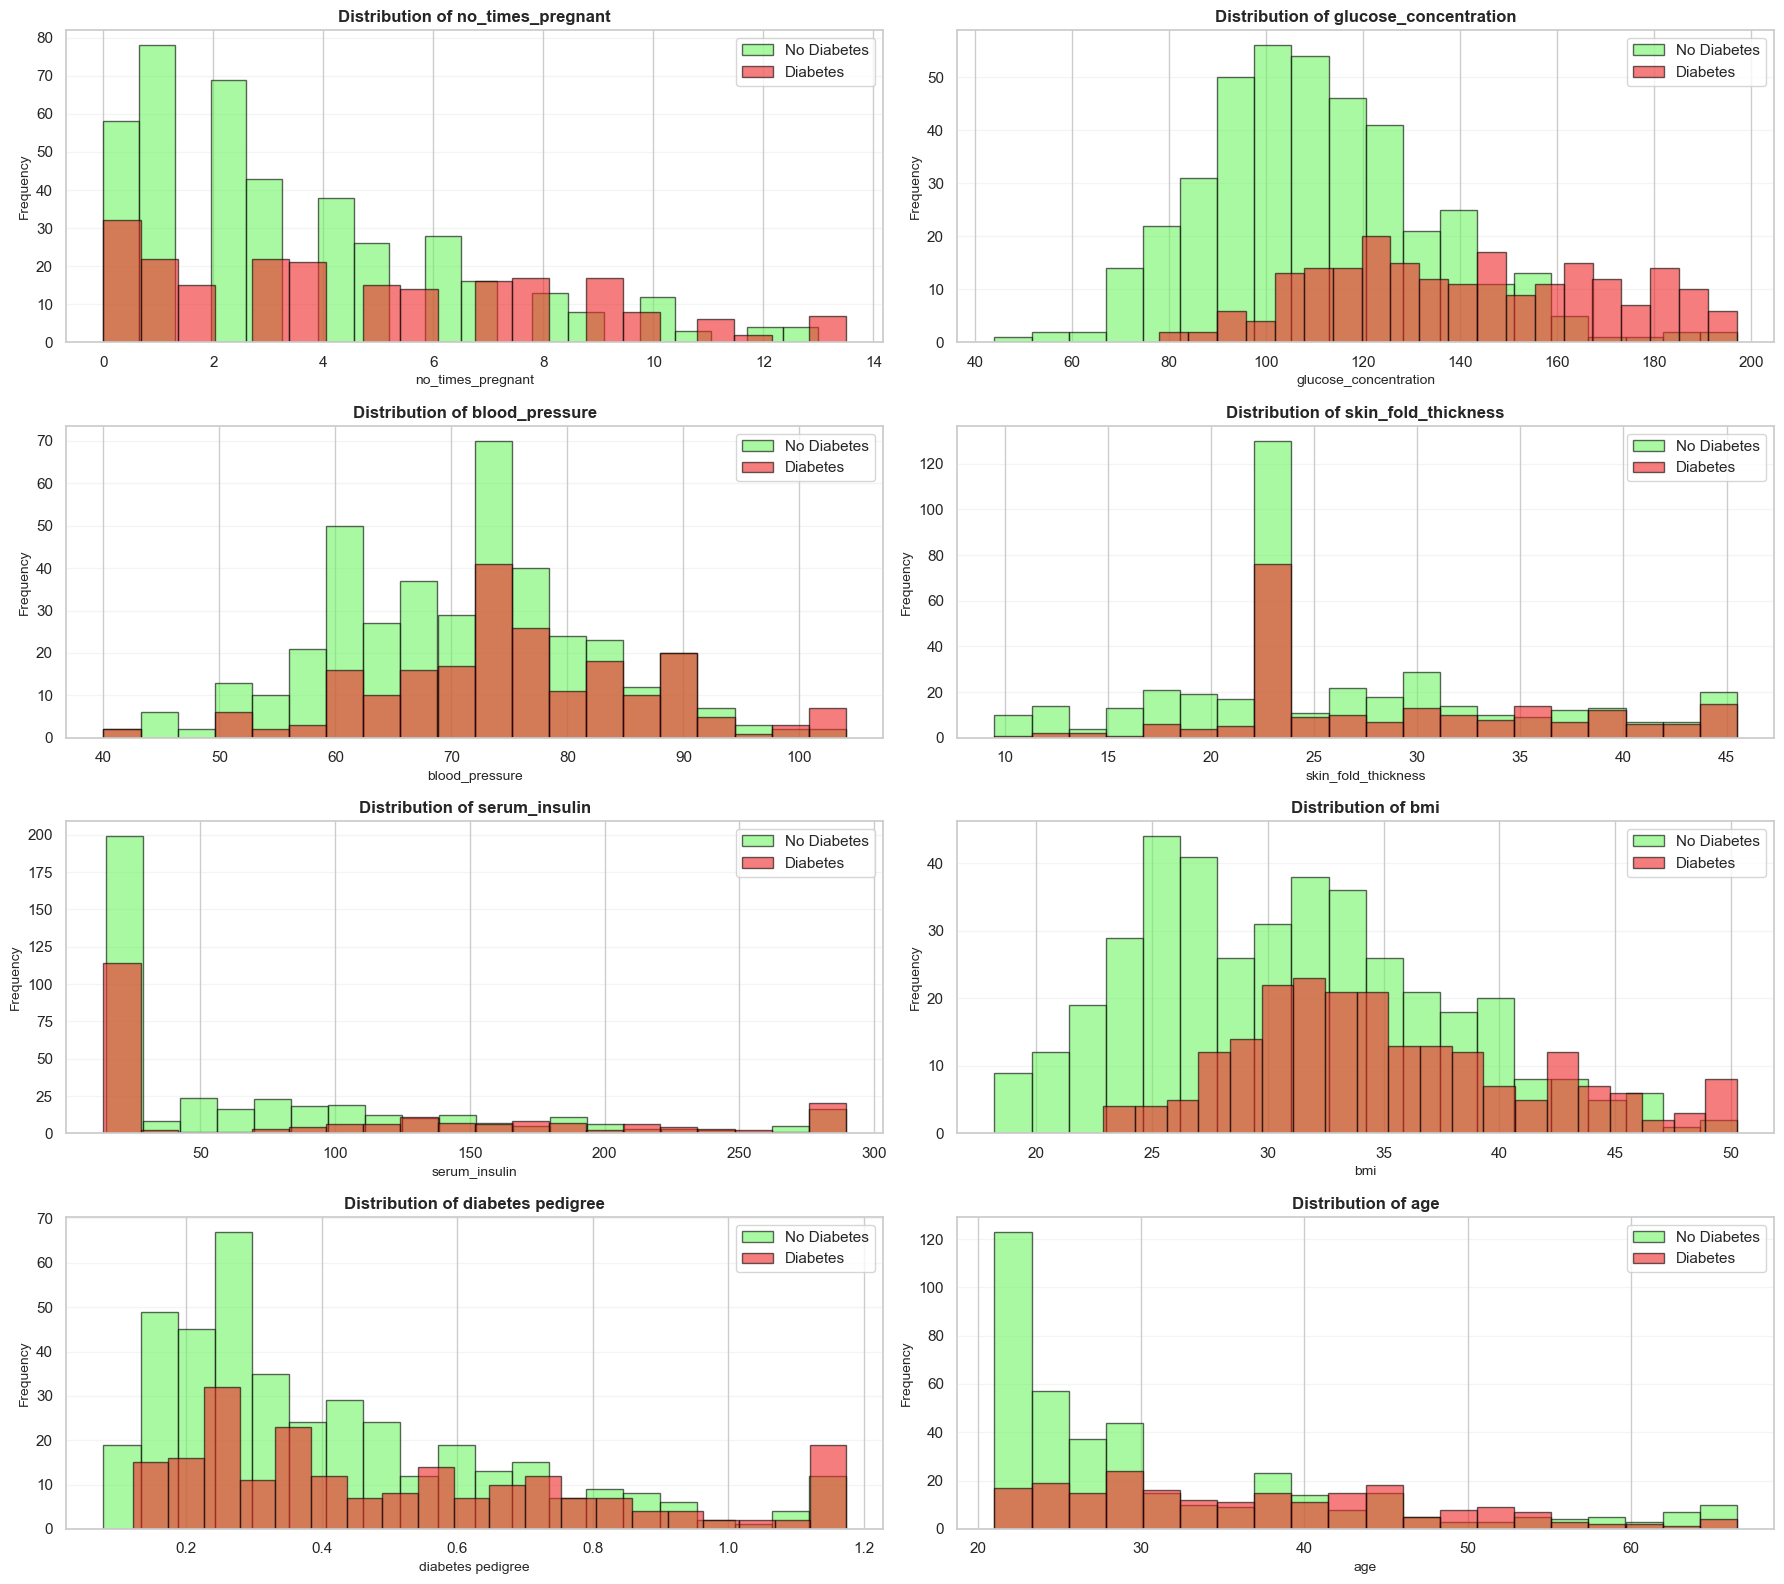

In [23]:
print_section('FEATURE DISTRIBUTIONS BY DIABETES')

### SET THE SUBPLOT GRID SHAPE
n_cols = 2
# Count no. of rows of subplots based on feature cols
n_rows = int(np.ceil(len(feature_cols) / n_cols))
# Create the grid 18-inch wide with 4 inches per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
# Flatten the 2D array of axes (n_rows, n_cols) to 1D for easy indexing of each subplot as axes(idx)
axes = axes.ravel() 

### FOR EVERY COLUMN AND ITS ENUMERATED INDEX IN feature_cols 
for idx, col in enumerate(feature_cols):
    ### PLOT FOR NON-DIABETIC
    train_clean[train_clean['diabetes']==0][col].hist(
        bins=20, alpha=0.6, label='No Diabetes', 
        color='#70F564', ax=axes[idx], edgecolor='black'
    )
    ### PLOT FOR DIABETIC
    train_clean[train_clean['diabetes']==1][col].hist(
        bins=20, alpha=0.6, label='Diabetes', 
        color='#F02626', ax=axes[idx], edgecolor='black'
    )
    ### SET PLOT ANNOTATIONS
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.2)

### HIDE UNUSED SUBPLOT (IF ANY)
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

- Obvious difference in glucose_concentration and BMI between diabetic and non-diabetic.
- Other features have similar distributions, though not perfectly equal.

## CORRELATION ANALYSIS

CORRELATION ANALYSIS


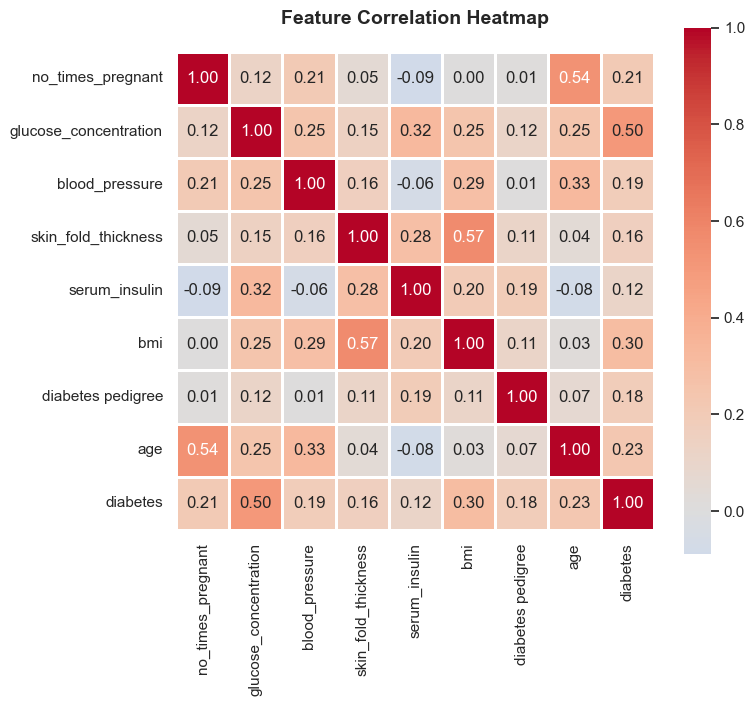


--- Correlations with Diabetes (Target Variable) ---
diabetes                 1.000
glucose_concentration    0.502
bmi                      0.299
age                      0.227
no_times_pregnant        0.207
blood_pressure           0.186
diabetes pedigree        0.185
skin_fold_thickness      0.159
serum_insulin            0.118
Name: diabetes, dtype: float64


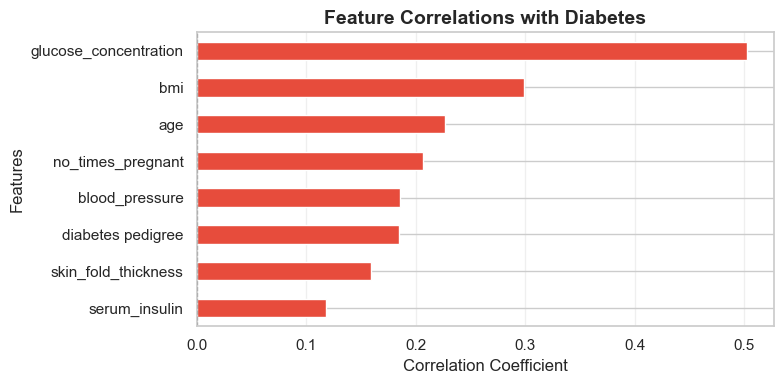

In [24]:
print_section('CORRELATION ANALYSIS')

### CALCULATE CORRELATION MATRIX
corr_matrix = train_clean[feature_cols + ['diabetes']].corr()

### PLOT CORRELATION HEATMAP
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### SHOW CORRELATIONS WITH TARGET
print('\n--- Correlations with Diabetes (Target Variable) ---')
diabetes_corr = corr_matrix['diabetes'].sort_values(ascending=False).round(3)
print(diabetes_corr)

### VISUALIZE CORRELATIONS WITH TARGET
plt.figure(figsize=(8, 4))

# Remove self-correlation (target-target)
# Show the highest corr value at the top 
diabetes_corr_plot = diabetes_corr.drop('diabetes').sort_values() 
               
colorsCorr = ['#e74c3c' if x > 0 else '#3498db' for x in diabetes_corr_plot.values]
diabetes_corr_plot.plot(kind='barh', color=colorsCorr)
plt.title('Feature Correlations with Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

- Glucose concentration has STRONGEST correlation with diabetes (0.502)
- BMI is second most correlated with diabetes (0.299)
- Other features show moderate-to-low correlation
- Some features are correlated with each other (multicollinearity)

## BOX PLOTS BY DIABETES

BOX PLOTS BY DIABETES STATUS


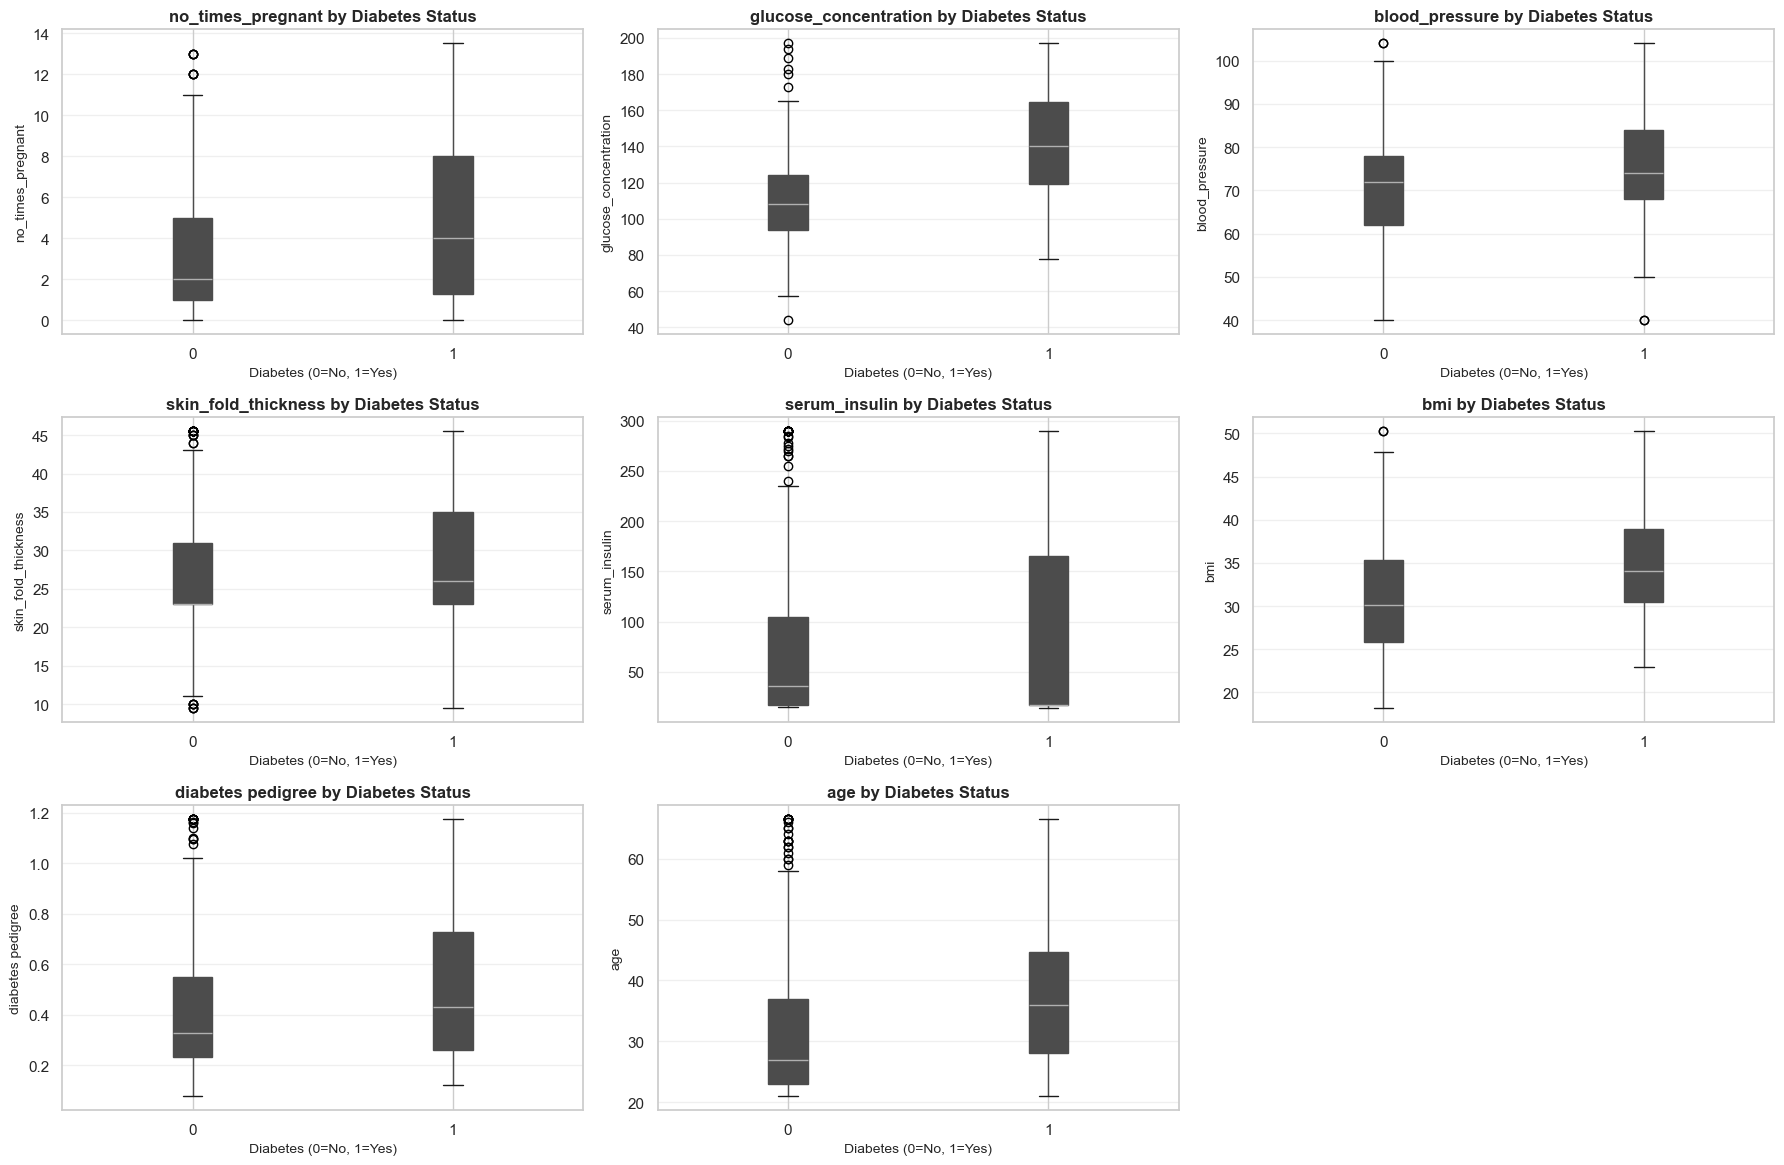

In [25]:
print_section('BOX PLOTS BY DIABETES STATUS')

### BUILD BOX PLOTS FOR ALL FEATURES BY DIABETES STATUS
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    train_clean.boxplot(column=col, by='diabetes', ax=axes[idx],
                        patch_artist=True, return_type='dict')
    axes[idx].set_title(f'{col} by Diabetes Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Diabetes (0=No, 1=Yes)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

### HIDE UNUSED SUBPLOT
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('')  # Remove default parent title
plt.tight_layout()
plt.show()

1. **Glucose concentration** shows the strongest separation between diabetic and non-diabetic groups.
    - Diabetic individuals have much higher glucose (higher median, higher quartiles, more extreme values).
    - This aligns with medical expectations and indicates glucose is the most discriminative feature.
2. Several features shift upward for diabetics (**age**, **BMI**, **pregnancies**).
    - **Age:** Diabetic individuals tend to be older on average.
    - **BMI:** Higher BMI among diabetics suggests a connection with obesity-related risk.
    - **Number of pregnancies:** The diabetic group shows higher median values.
    - These features show moderate separation but not as strong as **glucose concentration**.
3. High overlap in **blood pressure**, **skinfold thickness**, **insulin**, and **pedigree**.
    - Although the distributions overlap, diabetics tend to have:
        - Slightly higher blood pressure
        - Slightly higher skinfold thickness
        - Broader and higher insulin levels
        - Higher diabetes pedigree function (genetic risk indicator)
    - These features contribute information but *individually* are not determining factors to separate between statuses.

## SCATTER PLOTS

SCATTER PLOTS


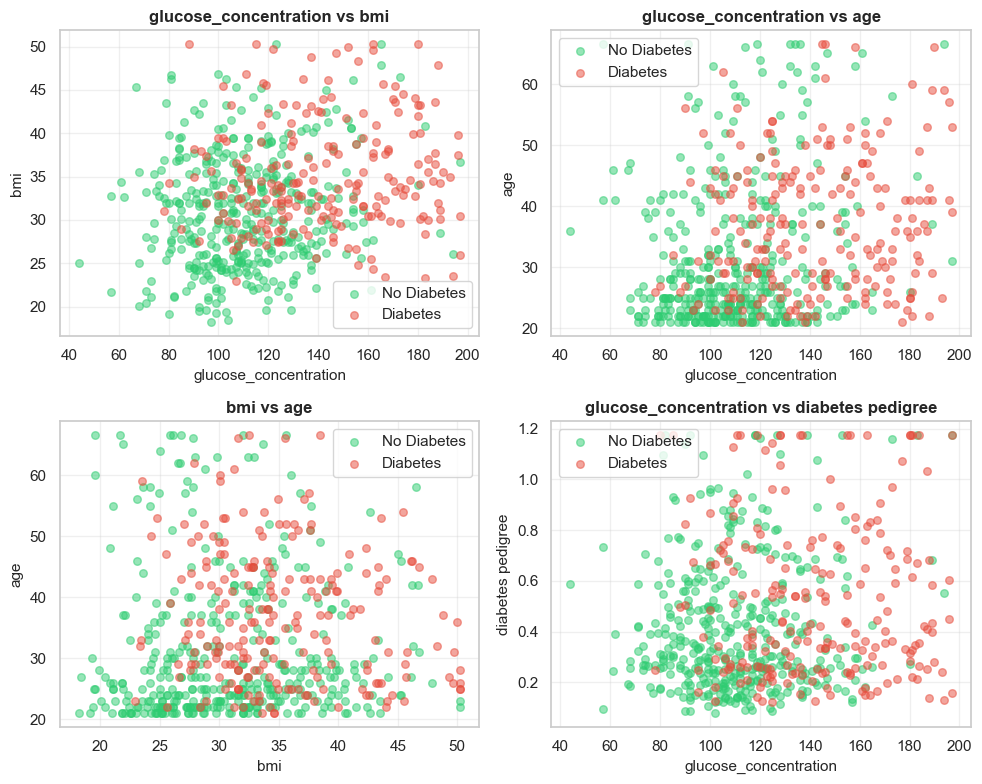

In [26]:
print_section('SCATTER PLOTS')

### CHOOSE MOST IMPORTANT FEATURES ONLY
# glucose_concentration, bmi, age, diabetes pedigree

### DEFINE THE SUBPLOT SHAPE
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

### DEFINE THE SCATTER PLOT COMBINATIONS
combinations = [
    ('glucose_concentration', 'bmi'),
    ('glucose_concentration', 'age'),
    ('bmi', 'age'),
    ('glucose_concentration', 'diabetes pedigree')
]
for idx, (feat1, feat2) in enumerate(combinations):
    ### PLOT NON-DIABETIC
    axes[idx].scatter(
        train_clean[train_clean['diabetes']==0][feat1],
        train_clean[train_clean['diabetes']==0][feat2],
        alpha=0.5, c='#2ecc71', label='No Diabetes', s=30
    )
    ### PLOT DIABETIC
    axes[idx].scatter(
        train_clean[train_clean['diabetes']==1][feat1],
        train_clean[train_clean['diabetes']==1][feat2],
        alpha=0.5, c='#e74c3c', label='Diabetes', s=30
    )
    ### SET PLOT ANNOTATIONS
    axes[idx].set_xlabel(feat1, fontsize=11)
    axes[idx].set_ylabel(feat2, fontsize=11)
    axes[idx].set_title(f'{feat1} vs {feat2}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

1. **Glucose concentration is strongly associated with diabetes**
    - Across all plots involving glucose concentration (vs BMI, age, and diabetes pedigree), individuals with diabetes generally have higher glucose levels compared to those without diabetes.
    - This indicates that glucose concentration is a strong indicator of diabetes risk.
2. **BMI and age show moderate separation**
    - In the BMI vs age plot, individuals with diabetes tend to cluster at slightly higher BMI and older ages *compared to* those without diabetes, but there is considerable overlap.
    - This suggests BMI and age contribute to diabetes risk but are **not as definitive alone**.
3. **Diabetes pedigree contributes to risk prediction**
    - In the glucose concentration vs diabetes pedigree plot, individuals with diabetes often have higher diabetes pedigree values, especially when combined with higher glucose levels.
    - This shows that a family history of diabetes (captured by the diabetes pedigree) is an important factor when assessing diabetes risk.

Overall, glucose concentration appears to be the strongest single indicator, while BMI, age, and diabetes pedigree provide additional context that can improve risk assessment.

# 5. FEATURE ENGINEERING

In [27]:
### PRESERVE DATASETS BEFORE FEATURE ENGINEERING
train_before_FE = train_clean.copy()
test_before_FE = test_clean.copy()

## CREATE CATEGORICAL FEATURES

### BMI CATEGORIES

In [28]:
print('--- CREATE BMI CATEGORIES BASED ON WHO CLASSIFICATIONS ---')
### DEFINE THE CATEGORICAL BINS AND LABELS BASED ON WHO CLASSIFICATIONS
bins_bmi = [0, 18.5, 25, 30, 100]
labels_bmi = [0, 1, 2, 3]  # 0=Underweight, 1=Normal, 2=Overweight, 3=Obese

### DO BINNING
train_clean['bmi_category'] = pd.cut(train_clean['bmi'], bins=bins_bmi, labels=labels_bmi)
test_clean['bmi_category'] = pd.cut(test_clean['bmi'], bins=bins_bmi, labels=labels_bmi)

print('BMI CATEGORIES CREATED:')
print('0 = Underweight (<18.5)')
print('1 = Normal (18.5-25)')
print('2 = Overweight (25-30)')
print('3 = Obese (>30)')

### SHOW THE CATEGORIES FOR TRAIN DATA
print(f'\nDISTRIBUTION IN TRAIN DATA:')
print(train_clean['bmi_category'].value_counts().sort_index())

--- CREATE BMI CATEGORIES BASED ON WHO CLASSIFICATIONS ---
BMI CATEGORIES CREATED:
0 = Underweight (<18.5)
1 = Normal (18.5-25)
2 = Overweight (25-30)
3 = Obese (>30)

DISTRIBUTION IN TRAIN DATA:
bmi_category
0      2
1     84
2    155
3    373
Name: count, dtype: int64


### AGE GROUPS

In [29]:
print('--- CREATE AGE GROUPS ---')
### DEFINE DESIRED CATEGORICAL BINS & LABELS
bins_age = [20, 30, 40, 50, 100]
labels_age = [0, 1, 2, 3]  # 0=20-29, 1=30-39, 2=40-49, 3=50+

### DO BINNING FOR TEST & TRAIN DATA
train_clean['age_group'] = pd.cut(train_clean['age'], bins=bins_age, labels=labels_age)
test_clean['age_group'] = pd.cut(test_clean['age'], bins=bins_age, labels=labels_age)

print('Age Groups created:')
print('0 = 20-29 years')
print('1 = 30-39 years')
print('2 = 40-49 years')
print('3 = 50+ years')

### SHOW THE CATEGORIES FOR TRAIN DATA
print(f'\nDISTRIBUTION IN TRAIN DATA:')
print(train_clean['age_group'].value_counts().sort_index())

--- CREATE AGE GROUPS ---
Age Groups created:
0 = 20-29 years
1 = 30-39 years
2 = 40-49 years
3 = 50+ years

DISTRIBUTION IN TRAIN DATA:
age_group
0    336
1    120
2     93
3     65
Name: count, dtype: int64


### GLUCOSE RISK CATEGORIES

In [30]:
print('--- CREATE GLUCOSE RISK CATEGORIES ---')
### DEFINE DESIRED CATEGORICAL BINS & LABELS
bins_glucose = [0, 100, 126, 200]
labels_glucose = [0, 1, 2]  # 0=Normal, 1=Prediabetic, 2=Diabetic range

### DO BINNING FOR TEST & TRAIN DATA
train_clean['glucose_category'] = pd.cut(train_clean['glucose_concentration'], 
                                     bins=bins_glucose, labels=labels_glucose)
test_clean['glucose_category'] = pd.cut(test_clean['glucose_concentration'], 
                                    bins=bins_glucose, labels=labels_glucose)

print('GLUCOSE RISK CATEGORIES CREATED:')
print('0 = Normal (<100 mg/dL)')
print('1 = Prediabetic (100-126 mg/dL)')
print('2 = Diabetic range (>126 mg/dL)')

### SHOW THE CATEGORIES FOR TRAIN DATA
print(f'\nDISTRIBUTION IN TRAIN DATA:')
print(train_clean['glucose_category'].value_counts().sort_index())

--- CREATE GLUCOSE RISK CATEGORIES ---
GLUCOSE RISK CATEGORIES CREATED:
0 = Normal (<100 mg/dL)
1 = Prediabetic (100-126 mg/dL)
2 = Diabetic range (>126 mg/dL)

DISTRIBUTION IN TRAIN DATA:
glucose_category
0    163
1    225
2    226
Name: count, dtype: int64


### CONVERT CATEGORICAL FEATURES TO NUMERIC

In [31]:
train_clean['bmi_category'] = train_clean['bmi_category'].astype(int)
test_clean['bmi_category'] = test_clean['bmi_category'].astype(int)
train_clean['age_group'] = train_clean['age_group'].astype(int)
test_clean['age_group'] = test_clean['age_group'].astype(int)
train_clean['glucose_category'] = train_clean['glucose_category'].astype(int)
test_clean['glucose_category'] = test_clean['glucose_category'].astype(int)

print('\n✅ CATEGORICAL FEATURES CREATED!')


✅ CATEGORICAL FEATURES CREATED!


## CREATE RATIO & INTERACTION FEATURES

### GLUCOSE-BMI RATIO

In [32]:
### CREATE
train_clean['glucose_bmi_ratio'] = train_clean['glucose_concentration']/ (train_clean['bmi'] + 1e-6)
test_clean['glucose_bmi_ratio'] = test_clean['glucose_concentration']/ (test_clean['bmi'] + 1e-6)

### SHOW MEAN & RANGE FOR TRAIN DATA
print('--- CREATE GLUCOSE-BMI RATIO ---')
print(f"Mean: {train_clean['glucose_bmi_ratio'].mean():.2f}")
print(f"Range: {train_clean['glucose_bmi_ratio'].min():.2f} to {train_clean['glucose_bmi_ratio'].max():.2f}")

--- CREATE GLUCOSE-BMI RATIO ---
Mean: 3.86
Range: 1.48 to 8.26


### GLUCOSE-INSULIN RATIO

In [33]:
### CREATE
train_clean['glucose_insulin_ratio'] = train_clean['glucose_concentration'] / (train_clean['serum_insulin'] + 1e-6)
test_clean['glucose_insulin_ratio'] = test_clean['glucose_concentration'] / (test_clean['serum_insulin'] + 1e-6)

### SHOW MEAN & RANGE FOR TRAIN DATA
print('--- CREATE GLUCOSE-INSULIN RATIO ---')
print(f"Mean: {train_clean['glucose_insulin_ratio'].mean():.2f}")
print(f"Range: {train_clean['glucose_insulin_ratio'].min():.2f} to {train_clean['glucose_insulin_ratio'].max():.2f}")

--- CREATE GLUCOSE-INSULIN RATIO ---
Mean: 4.11
Range: 0.36 to 12.86


### GLUCOSE-INSULIN INTERACTION

In [34]:
### CREATE
train_clean['glucose_insulin_interaction'] = train_clean['glucose_concentration'] * train_clean['serum_insulin']
test_clean['glucose_insulin_interaction'] = test_clean['glucose_concentration'] * test_clean['serum_insulin']

### SHOW MEAN FOR TRAIN DATA
print('--- CREATE GLUCOSE-INSULIN INTERACTION ---')
print(f"Mean: {train_clean['glucose_insulin_interaction'].mean():.2f}")

--- CREATE GLUCOSE-INSULIN INTERACTION ---
Mean: 10456.34


### BMI-AGE INTERACTION

In [35]:
### CREATE
train_clean['bmi_age_interaction'] = train_clean['bmi'] * train_clean['age']
test_clean['bmi_age_interaction'] = test_clean['bmi'] * test_clean['age']

### SHOW MEAN FOR TRAIN DATA
print('--- CREATE BMI-AGE INTERACTION ---')
print(f"Mean: {train_clean['bmi_age_interaction'].mean():.2f}")

--- CREATE BMI-AGE INTERACTION ---
Mean: 1079.63


### PREGNANCY-AGE INTERACTION

In [36]:
### CREATE
train_clean['pregnancy_age_interaction'] = train_clean['no_times_pregnant'] * train_clean['age']
test_clean['pregnancy_age_interaction'] = test_clean['no_times_pregnant'] * test_clean['age']

### SHOW MEAN FOR TRAIN DATA
print('--- CREATE PREGNANCY-AGE INTERACTION ---')
print(f"Mean: {train_clean['pregnancy_age_interaction'].mean():.2f}")

print('\n✅ Ratio and interaction features created successfully!')

--- CREATE PREGNANCY-AGE INTERACTION ---
Mean: 149.06

✅ Ratio and interaction features created successfully!


## CREATE HIGH-RISK FLAGS

### HIGH GLUCOSE FLAG

In [37]:
### DEFINE THRESHOLD
glucose_threshold = 130  # mg/dL (diabetic range)

### CREATE FLAGS
train_clean['high_glucose_flag'] = (train_clean['glucose_concentration'] >= glucose_threshold).astype(int)
test_clean['high_glucose_flag'] = (test_clean['glucose_concentration'] >= glucose_threshold).astype(int)

### SHOW FLAG LOGIC & COUNT FOR TRAIN DATA 
print('--- CREATE HGH GLUCOSE FLAG ---')
print(f'high_glucose_flag = 1 if glucose_concentration >= {glucose_threshold} mg/dL; 0 otherwise')
print(f'{train_clean["high_glucose_flag"].sum()} patients ({train_clean["high_glucose_flag"].mean()*100:.1f}%) flagged in TRAIN data')

--- CREATE HGH GLUCOSE FLAG ---
high_glucose_flag = 1 if glucose_concentration >= 130 mg/dL; 0 otherwise
206 patients (33.6%) flagged in TRAIN data


### HIGH BMI FLAG

In [38]:
### DEFINE THRESHOLD
bmi_threshold = 30  # Obese category

### CREATE FLAGS
train_clean['high_bmi_flag'] = (train_clean['bmi'] >= bmi_threshold).astype(int)
test_clean['high_bmi_flag'] = (test_clean['bmi'] >= bmi_threshold).astype(int)

### SHOW FLAG LOGIC & COUNT FOR TRAIN DATA
print('--- CREATE HIGH BMI FLAG ---')
print(f'high_bmi_flag = 1 if BMI >= {bmi_threshold}; 0 otherwise')
print(f'{train_clean["high_bmi_flag"].sum()} patients ({train_clean["high_bmi_flag"].mean()*100:.1f}%) flagged in TRAIN data') 

--- CREATE HIGH BMI FLAG ---
high_bmi_flag = 1 if BMI >= 30; 0 otherwise
379 patients (61.7%) flagged in TRAIN data


### HIGH BLOOD PRESSURE FLAG

In [39]:
### DEFINE THRESHOLD
bp_threshold = 90  # mmHg (hypertension stage 1)

### CREATE FLAGS
train_clean['high_bp_flag'] = (train_clean['blood_pressure'] >= bp_threshold).astype(int)
test_clean['high_bp_flag'] = (test_clean['blood_pressure'] >= bp_threshold).astype(int)

### SHOW FLAG LOGIC & COUNT FOR TRAIN DATA
print('--- CREATE HIGH BLOOD PRESSURE FLAG ---')
print(f'high_bp_flag = 1 if BP >= {bp_threshold} mmHg; 0 otherwise')
print(f'{train_clean["high_bp_flag"].sum()} patients ({train_clean["high_bp_flag"].mean()*100:.1f}%) flagged in TRAIN data') 

--- CREATE HIGH BLOOD PRESSURE FLAG ---
high_bp_flag = 1 if BP >= 90 mmHg; 0 otherwise
49 patients (8.0%) flagged in TRAIN data


### HIGH AGE FLAG

In [40]:
### DEFINE THRESHOLD
age_threshold = 40

### CREATE FLAGS
train_clean['high_age_flag'] = (train_clean['age'] >= age_threshold).astype(int)
test_clean['high_age_flag'] = (test_clean['age'] >= age_threshold).astype(int)

### SHOW FLAG LOGIC & COUNT FOR TRAIN DATA
print('--- CREATE HIGH AGE FLAG ---')
print(f'high_age_flag = 1 if age >= {age_threshold}; 0 otherwise')
print(f'{train_clean["high_age_flag"].sum()} patients ({train_clean["high_age_flag"].mean()*100:.1f}%) flagged in TRAIN data')

--- CREATE HIGH AGE FLAG ---
high_age_flag = 1 if age >= 40; 0 otherwise
167 patients (27.2%) flagged in TRAIN data


### HIGH PREGNANCY COUNT FLAG

In [41]:
### DEFINE THRESHOLD
preg_threshold = 5

### CREATE FLAGS
train_clean['high_preg_flag'] = (train_clean['no_times_pregnant'] >= preg_threshold).astype(int)
test_clean['high_preg_flag'] = (test_clean['no_times_pregnant'] >= preg_threshold).astype(int)

### SHOW FLAG LOGIC & COUNT FOR TRAIN DATA
print('--- CREATE HIGH PREGNANCY COUNT FLAG ---')
print(f'high_preg_flag = 1 if pregnancies >= {preg_threshold}; 0 otherwise')
print(f'{train_clean["high_preg_flag"].sum()} patients ({train_clean["high_preg_flag"].mean()*100:.1f}%) flagged in TRAIN data')

--- CREATE HIGH PREGNANCY COUNT FLAG ---
high_preg_flag = 1 if pregnancies >= 5; 0 otherwise
216 patients (35.2%) flagged in TRAIN data


### COMBINED RISK SCORE

In [42]:
### SUM THE HIGH-RISK FLAGS INTO RISK SCORES COLUMNS
train_clean['risk_score'] = (train_clean['high_glucose_flag'] + 
                             train_clean['high_bmi_flag'] + 
                             train_clean['high_bp_flag'] + 
                             train_clean['high_age_flag'] + 
                             train_clean['high_preg_flag'])
test_clean['risk_score'] = (test_clean['high_glucose_flag'] + 
                            test_clean['high_bmi_flag'] + 
                            test_clean['high_bp_flag'] + 
                            test_clean['high_age_flag'] + 
                            test_clean['high_preg_flag'])

### SHOW COMBINED RISK SCORE FOR TRAIN DATA
print('--- CREATE COMBINED RISK SCORE ---')
print('risk_score: Sum of all high-risk flags (0-5)')
print(f'Mean risk score: {train_clean["risk_score"].mean():.2f}')

print(f'\nDISTRIBUTION IN TRAIN DATA:')
print(train_clean['risk_score'].value_counts().sort_index())

print('\n✅ High-risk flags created successfully!')

--- CREATE COMBINED RISK SCORE ---
risk_score: Sum of all high-risk flags (0-5)
Mean risk score: 1.66

DISTRIBUTION IN TRAIN DATA:
risk_score
0    113
1    200
2    149
3     99
4     43
5     10
Name: count, dtype: int64

✅ High-risk flags created successfully!


## CREATE POLYNOMIAL FEATURES

In [43]:
print('--- CREATE SQUARED FEATURES FOR NON-LINEAR RELATIONSHIPS ---')

### GLUCOSE SQUARED
train_clean['glucose_squared'] = train_clean['glucose_concentration'] ** 2
test_clean['glucose_squared'] = test_clean['glucose_concentration'] ** 2
print('glucose_squared: Glucose concentration squared')

### BMI SQUARED
train_clean['bmi_squared'] = train_clean['bmi'] ** 2
test_clean['bmi_squared'] = test_clean['bmi'] ** 2
print('bmi_squared: BMI squared')

### AGE SQUARED
train_clean['age_squared'] = train_clean['age'] ** 2
test_clean['age_squared'] = test_clean['age'] ** 2
print('age_squared: Age squared')

print('\n✅ Polynomial features created successfully!')

--- CREATE SQUARED FEATURES FOR NON-LINEAR RELATIONSHIPS ---
glucose_squared: Glucose concentration squared
bmi_squared: BMI squared
age_squared: Age squared

✅ Polynomial features created successfully!


## CREATE LOG-TRANSFORMED FEATURES

In [44]:
print('--- CREATE LOG-TRANSFORMED FEATURES FOR SKEWED FEATURES ---')

### INSULIN
train_clean['insulin_log'] = np.log1p(train_clean['serum_insulin'])
test_clean['insulin_log'] = np.log1p(test_clean['serum_insulin'])
print('insulin_log: Log-transformed insulin')

### DIABETES PEDIGREE
train_clean['pedigree_log'] = np.log1p(train_clean['diabetes pedigree'])
test_clean['pedigree_log'] = np.log1p(test_clean['diabetes pedigree'])
print('pedigree_log: Log-transformed diabetes pedigree function')

print('\n✅ Log-transformed features created successfully!')

--- CREATE LOG-TRANSFORMED FEATURES FOR SKEWED FEATURES ---
insulin_log: Log-transformed insulin
pedigree_log: Log-transformed diabetes pedigree function

✅ Log-transformed features created successfully!


## FEATURE ENGINEERING SUMMARY

In [45]:
print_section('FEATURE ENGINEERING SUMMARY')

### FEATURE BEFORE AND AFTER FEATURE ENGINEERING
original_features = list(train_before_FE.columns)
new_features = [col for col in train_clean.columns if col not in original_features]

print(f'\n--- FEATURE COUNTS ---')
print(f'\nOriginal feature count: {len(original_features)}')
print(f'New features created: {len(new_features)}')
print(f'Total feature count: {len(train_clean.columns)}')

### NEW FEATURES
print(f'\n--- NEW FEATURES CREATED ---')
for i, feat in enumerate(new_features, 1):
    print(f'{i:2d}. {feat}')

print('\nCategorical Features: 3 (bmi_category, age_group, glucose_category)')
print('Ratio Features: 2 (glucose_bmi_ratio, glucose_insulin_ratio)')
print('Interaction Features: 3 (glucose_insulin_interaction, bmi_age_interaction, pregnancy_age_interaction)')
print('High-Risk Flags: 6 (5 individual flags + 1 combined risk score)')
print('Polynomial Features: 3 (glucose_squared, bmi_squared, age_squared)')
print('Log-Transformed Features: 2 (insulin_log, pedigree_log)')

### DISPLAY SAMPLE VALUES OF ENGINEERED FEATURES
print(f'\n--- SAMPLE VALUES OF ENGINEERED FEATURES ---')
display(train_clean[new_features].head())

print('\n✅ FEATURE ENGINEERING COMPLETED!')
print('Ready to proceed with model training.\n')

FEATURE ENGINEERING SUMMARY

--- FEATURE COUNTS ---

Original feature count: 10
New features created: 19
Total feature count: 29

--- NEW FEATURES CREATED ---
 1. bmi_category
 2. age_group
 3. glucose_category
 4. glucose_bmi_ratio
 5. glucose_insulin_ratio
 6. glucose_insulin_interaction
 7. bmi_age_interaction
 8. pregnancy_age_interaction
 9. high_glucose_flag
10. high_bmi_flag
11. high_bp_flag
12. high_age_flag
13. high_preg_flag
14. risk_score
15. glucose_squared
16. bmi_squared
17. age_squared
18. insulin_log
19. pedigree_log

Categorical Features: 3 (bmi_category, age_group, glucose_category)
Ratio Features: 2 (glucose_bmi_ratio, glucose_insulin_ratio)
Interaction Features: 3 (glucose_insulin_interaction, bmi_age_interaction, pregnancy_age_interaction)
High-Risk Flags: 6 (5 individual flags + 1 combined risk score)
Polynomial Features: 3 (glucose_squared, bmi_squared, age_squared)
Log-Transformed Features: 2 (insulin_log, pedigree_log)

--- SAMPLE VALUES OF ENGINEERED FEATURES 

,bmi_category,age_group,glucose_category,glucose_bmi_ratio,glucose_insulin_ratio,glucose_insulin_interaction,bmi_age_interaction,pregnancy_age_interaction,high_glucose_flag,high_bmi_flag,high_bp_flag,high_age_flag,high_preg_flag,risk_score,glucose_squared,bmi_squared,age_squared,insulin_log,pedigree_log
0,3,0,1,3.284457,1.191489,10528.0,886.6,52.0,0,1,0,0,0,1,12544,1162.81,676.0,4.553877,0.273837
1,3,3,2,3.907104,0.979452,20878.0,1866.6,561.0,1,1,1,1,1,5,20449,1339.56,2601.0,4.990433,0.226338
2,3,0,0,2.447368,0.581250,14880.0,874.0,46.0,0,1,0,0,0,1,8649,1444.00,529.0,5.081404,0.515216
3,3,2,1,3.084833,0.600000,24000.0,1594.9,41.0,0,1,0,1,0,2,14400,1513.21,1681.0,5.303305,0.771034
4,3,0,2,3.950617,0.673684,24320.0,874.8,81.0,0,1,0,0,0,1,16384,1049.76,729.0,5.252273,0.437610



✅ FEATURE ENGINEERING COMPLETED!
Ready to proceed with model training.



In [46]:
### DISPLAY FINAL DATASETS READY FOR ML
print('--- FINAL DATASETS READY FOR ML ---')
print(f'Train shape: {train_clean.shape}')
print(f'Test shape: {test_clean.shape}')
print(f'\nFirst 5 rows of TRAIN data:')
display(train_clean.head())

--- FINAL DATASETS READY FOR ML ---
Train shape: (614, 29)
Test shape: (154, 28)

First 5 rows of TRAIN data:


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes,bmi_category,age_group,glucose_category,glucose_bmi_ratio,glucose_insulin_ratio,glucose_insulin_interaction,bmi_age_interaction,pregnancy_age_interaction,high_glucose_flag,high_bmi_flag,high_bp_flag,high_age_flag,high_preg_flag,risk_score,glucose_squared,bmi_squared,age_squared,insulin_log,pedigree_log
0,316,2.0,112,68,22.0,94.0,34.1,0.315,26.0,0,3,0,1,3.284457,1.191489,10528.0,886.6,52.0,0,1,0,0,0,1,12544,1162.81,676.0,4.553877,0.273837
1,25,11.0,143,94,33.0,146.0,36.6,0.254,51.0,1,3,3,2,3.907104,0.979452,20878.0,1866.6,561.0,1,1,1,1,1,5,20449,1339.56,2601.0,4.990433,0.226338
2,710,2.0,93,64,32.0,160.0,38.0,0.674,23.0,1,3,0,0,2.447368,0.581250,14880.0,874.0,46.0,0,1,0,0,0,1,8649,1444.00,529.0,5.081404,0.515216
3,658,1.0,120,80,45.5,200.0,38.9,1.162,41.0,0,3,2,1,3.084833,0.600000,24000.0,1594.9,41.0,0,1,0,1,0,2,14400,1513.21,1681.0,5.303305,0.771034
4,542,3.0,128,72,25.0,190.0,32.4,0.549,27.0,1,3,0,2,3.950617,0.673684,24320.0,874.8,81.0,0,1,0,0,0,1,16384,1049.76,729.0,5.252273,0.437610


# 6. MACHINE LEARNING
- Goal: Train classification models and select the best one.
- Algorithms: k-Nearest Neighbors, Decision Tree, Random Forest.

In [47]:
### MAKE COPIES TO PRESERVE DATA
train_before_ML = train_clean.copy()
test_before_ML = test_clean.copy()

## PREP DATA FOR MODELING

In [48]:
print('--- PREP DATA FOR MODELING ---')

### DROP NON-PREDICTIVE IDENTIFIER (p_id) AND SEPARATE FEATURES (X) FROM TARGET (y)
X = train_clean.drop(['p_id', 'diabetes'], axis=1)
y = train_clean['diabetes']
X_test_final = test_clean.drop(['p_id'], axis=1) # Reserve for final predictions

### SPLIT TRAIN DATA INTO 80% TRAINING & 20% VALIDATION
# Set the random_state seed (42) to ensure same random split for every run
# stratify=y to have equal proportion of each class in train & val during split, based on y
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'\nTrain set: {X_train.shape}')
print(f'Validation set: {X_val.shape}')

### FEATURE SCALING
scaler = StandardScaler()
# FIT THE SCALER ON TRAIN SETS ONLY AND TRANSFORM IT
X_train_scaled = scaler.fit_transform(X_train)
# TRANSFORM THE VALIDATION AND TEST SETS USING THE SAME SCALER
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

print('\n✅ Data prepared for modeling')

--- PREP DATA FOR MODELING ---

Train set: (491, 27)
Validation set: (123, 27)

✅ Data prepared for modeling


## TRAIN CLASSIFICATION MODELS

In [49]:
### INITIALIZE MODELS IN A DICTIONARY
models = {
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

### DEFINE AN EMPTY LIST TO STORE THE TRAINING RESULTS
results = [] 

### LOOP THROUGH EACH MODEL
for name, model in models.items():
    ### SHOW WHAT MODEL IS BEING TRAINED
    print(f'\nTraining {name}...')
    
    ### TRAIN MODEL
    model.fit(X_train_scaled, y_train)
    
    ### USE TRAINED MODEL TO PREDICT THE TARGET (y) IN THE VALIDATION SET
    y_pred = model.predict(X_val_scaled)
    
    ### CALCULATE METRICS
    accuracy = accuracy_score(y_val, y_pred) # % of correct predictions overall
    precision = precision_score(y_val, y_pred) # % of predicted positives that are actually positive
    recall = recall_score(y_val, y_pred) # % of actual positives correctly predicted
    f1 = f1_score(y_val, y_pred) # Harmonic mean of precision & recall (balances both)
    
    ### STORE RESULTS
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    ### SHOW REPORT
    print(f'☑️ {name} trained')
    print(f'- Accuracy: {accuracy:.3f}')
    print(f'- Precision: {precision:.3f}')
    print(f'- Recall: {recall:.3f}')
    print(f'- F1-Score: {f1:.3f}')

print('\n✅ All models trained successfully')


Training k-Nearest Neighbors...
☑️ k-Nearest Neighbors trained
- Accuracy: 0.813
- Precision: 0.717
- Recall: 0.767
- F1-Score: 0.742

Training Decision Tree...
☑️ Decision Tree trained
- Accuracy: 0.772
- Precision: 0.683
- Recall: 0.651
- F1-Score: 0.667

Training Random Forest...
☑️ Random Forest trained
- Accuracy: 0.813
- Precision: 0.717
- Recall: 0.767
- F1-Score: 0.742

✅ All models trained successfully


## COMPARE MODEL PERFORMANCE

--- MODEL PERFORMANCE METRICS COMPARISON ---


,Model,Accuracy,Precision,Recall,F1-Score
0,k-Nearest Neighbors,0.813008,0.717391,0.767442,0.741573
2,Random Forest,0.813008,0.717391,0.767442,0.741573
1,Decision Tree,0.772358,0.682927,0.651163,0.666667


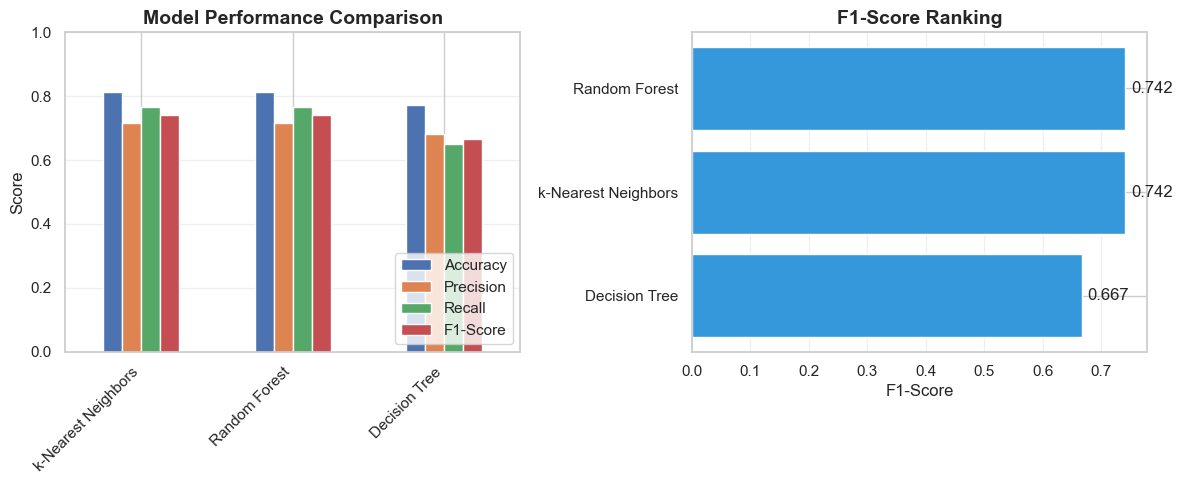


🏆 BEST MODEL: k-Nearest Neighbors
   F1-Score: 0.742


In [50]:
### CREATE COMPARISON DF FROM RESULTS, SORTED BY DESCENDING F1-Score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print('--- MODEL PERFORMANCE METRICS COMPARISON ---')
display(results_df)

### VISUALIZE COMPARISON IN BAR CHART
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

### LEFT SUBPLOT axes[0] TO COMPARE ALL MODEL PERFORMANCE METRICS
# Plot on the left
ax1 = axes[0]
results_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
                kind='bar', ax=ax1)

# Set plot annotations
ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1])

### RIGHT SUBPLOT axes[1] TO COMPARE F1-Score ONLY
# Plot on the right
ax2 = axes[1]
results_df_sorted = results_df.sort_values('F1-Score')

# Set plot annotations
ax2.barh(results_df_sorted['Model'], results_df_sorted['F1-Score'], color='#3498db')
ax2.set_title('F1-Score Ranking', fontsize=14, fontweight='bold')
ax2.set_xlabel('F1-Score', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# Add F1-Score value labels
for i, v in enumerate(results_df_sorted['F1-Score']):
    ax2.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1-Score']

print(f'\n🏆 BEST MODEL: {best_model_name}')
print(f'   F1-Score: {best_f1:.3f}')

- Both kNN and Random Forest models have the same values of performance metrics.
- For simplicity and easier interpretation, kNN is chosen.

## EVALUATE BEST MODEL

--- CONFUSION MATRIX: k-Nearest Neighbors ---


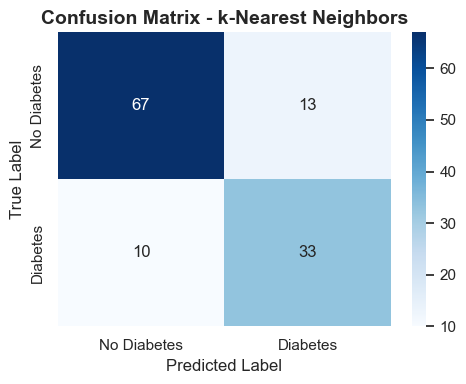


--- Classification Report: k-Nearest Neighbors ---
              precision    recall  f1-score   support

 No Diabetes       0.87      0.84      0.85        80
    Diabetes       0.72      0.77      0.74        43

    accuracy                           0.81       123
   macro avg       0.79      0.80      0.80       123
weighted avg       0.82      0.81      0.81       123



In [51]:
### GET BEST MODEL AND ITS PREDICTIONS ON y IN THE VALIDATION SET
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_val_scaled)

### CONFUSION MATRIX TO SEE WHERE THE MODEL IS MAKING MISTAKES
print(f'--- CONFUSION MATRIX: {best_model_name} ---')
cm = confusion_matrix(y_val, y_pred_best)

### VISUALIZE CONFUSION MATRIX
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # annot=True adds the values; fmt='d' present them as int
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])

# Set plot annotations
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

### CLASSIFICATION REPORT
# Precision: Of all patients predicted as diabetics, how many actually are?
# Recall: Of all actual diabetics, how many were correctly identified?
# F1-Score: Balances precision and recall - important when false negatives are costly.
# Support: Number of true samples for each class, gives context to the metrics
print(f'\n--- Classification Report: {best_model_name} ---')
print(classification_report(y_val, y_pred_best, target_names=['No Diabetes', 'Diabetes']))

**CONFUSION MATRIX**
- ✅ Most non-diabetic patients are correctly identified (67/80).
- ⚠️ Some diabetic patients are missed (10/43).

**CLASSIFICATION REPORT**
- Accuracy: 0.81 => 81% of predictions are correct overall.
- Macro avg (unweighted): 0.80 => average of F1 across classes (diabetics & non-diabetics), treats both classes equally.
- Weighted avg: 0.81 => average of F1 weighted by class size, slightly favors the majority class (non-diabetics).
- F1-Score for diabetic patients (0.74) is lower than for non-diabetic (0.85) => the model struggles more with detecting diabetics.

## MAKE PREDICTIONS ON TEST DATASET USING BEST MODEL 

In [52]:
### MAKE PREDICTIONS ON TEST DATASET USING BEST MODEL
test_predictions = best_model.predict(X_test_scaled)

### CREATE A DF OF PREDICTION RESULTS
predictions_df = pd.DataFrame({
    'p_id': test_clean['p_id'],
    'predicted_diabetes': test_predictions
})

print(f'\n✅ Predictions completed for {len(predictions_df)} test samples')
print(f'Prediction distribution:')
print(predictions_df['predicted_diabetes'].value_counts())

### SHOW SAMPLE PREDICTIONS
print(f'\nSample predictions:')
display(predictions_df.head())


✅ Predictions completed for 154 test samples
Prediction distribution:
predicted_diabetes
0    103
1     51
Name: count, dtype: int64

Sample predictions:


,p_id,predicted_diabetes
0,437,1
1,411,0
2,639,0
3,213,1
4,181,0


## ML SUMMARY

In [53]:
print(f'''
--- ML RESULTS SUMMARY ---
- ALGORITHMS TESTED: {', '.join(models)}
- BEST MODEL: {best_model_name}                        
- PERFORMANCE (VALIDATION SET):      
    - Accuracy:  {results_df.iloc[0]["Accuracy"]:.4f}     
    - Precision: {results_df.iloc[0]["Precision"]:.4f}     
    - Recall:    {results_df.iloc[0]["Recall"]:.4f}      
    - F1-Score:  {results_df.iloc[0]["F1-Score"]:.4f}
- TEST PREDICTIONS:                  
   - Total samples: {len(predictions_df)}
   - Predictions saved in: predictions_df 
''')

print('\n✅ ML COMPLETED!')
print('✅ PROJECT COMPLETED!')


--- ML RESULTS SUMMARY ---
- ALGORITHMS TESTED: k-Nearest Neighbors, Decision Tree, Random Forest
- BEST MODEL: k-Nearest Neighbors                        
- PERFORMANCE (VALIDATION SET):      
    - Accuracy:  0.8130     
    - Precision: 0.7174     
    - Recall:    0.7674      
    - F1-Score:  0.7416
- TEST PREDICTIONS:                  
   - Total samples: 154
   - Predictions saved in: predictions_df 


✅ ML COMPLETED!
✅ PROJECT COMPLETED!
